# Credit Card Fraud Detection Project

**SURAJ GUPTA**

**Practical Motivation | Problem Formulation**

**Background** 

Credit card fraud is a growing concern in today's digital age with vast implications in terms of cost on the government, corporate organizations, financial industry and consumers. With the widespread proliferation of the internet technology, this had led to increased convenience with credit card transactions. However, this has resulted in the expedition of credit card frauds as well. In a CNA article, about $500,000 was stolen in fraudulent card payments involving diversion of SMS one-time passwords, from September to December 2020. This leads us to our mini project which is to leverage on machine learning to effectively detect credit card fraud. 

**What is credit card fraud?** 

Credit card fraud involves the unauthorized use of another individual's credit card or account information to make unauthorized payments or access of funds. 

**Problem statement** 

The credit card detection problem involves modelling past credit card transactions with the knowledge of the ones that turned out to be fraudulent. The model will then be tested on a test set to see if we can accurately identify which transaction is fraudulent. We aim to achieve a 100% accuracy rate in detection. With the success of the credit card fraud detector, we would be able to greatly minimize the potential loss of large amounts of funds, saving consumers and businesses the time and resources needed to resolve the fraud transaction. Moreover, being able to recognize fraudulent credit card transactions mitigates against the costs that consumers may incur for items they did not purchase. 

**Challenges** 

Credit card transaction datasets are highly imbalanced and skewed. Imbalanced data can negatively affect model performance and precision because we are using a binary classifier (Fraud vs no fraud). We may also end up with the problem where a low FPR is obtained despite high number of false positives.  Furthermore, fraudulent behavior profile is dynamic and tend to look like legitimate transactions, thereby making it difficult to detect.  

**Sample Collection**

Dataset: https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTest.csv

It is a simulated credit card transaction dataset containing legitimate and fraudulent transactions from the duration of 1 January 2019 – 31 Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. Simulation source is from Sparkov Data Generation | Github tool created by Brandon Harris. 

**Variables** 

1. **index** - Unique Identifier for each row 


2. **transdatetrans_time** - Transaction DateTime 


3. **cc_num** - Credit Card Number of Customer


4. **merchant** - Merchant Name


5. **category** - Category of Merchant


6. **amt** - Amount of Transaction


7. **first** - First Name of Credit Card Holder


8. **last** - Last Name of Credit Card Holder 


9. **gender** - Gender of Credit Card Holder 


10. **street** - Street Address of Credit Card Holder 


11. **city** - City of Credit Card Holder 


12. **state** - State of Credit Card Holder 


13. **zip** - Zip of Credit Card Holder 


14. **lat** - Latitude Location of Credit Card Holder 


15. **long** - Longitude Location of Credit Card Holder 


16. **city_pop** - Credit Card Holder's City Population 


17. **job** - Job of Credit Card Holder


18. **dob** - Date of Birth of Credit Card Holder


19. **trans_num** - Transaction Number 


20. **unix_time** - UNIX Time of transaction 


21. **merch_lat** - Latitude Location of Merchant


22. **merch_long** - Longitude Location of Merchant 


23. **is_fraud** - Fraud Flag <--- Target Class 

# Procedure Planned to be followed:

- **Understanding the dataset and cleaning**


- **Exploratory Data Analysis (EDA)**


- **Feature Engineering**


- **Train-Test Split**


- **Feature Label Encoding**


- **Feature Selection**


- **Scaling**
    1. Robust Scaler
    2. MinMax Scaler
    3. Standard Scaler
    
    
- **Class imbalance**
    1. Under sampling
    2. Over sampling
    3. SMOTE   
    


- **Model building and testing**
    1. Naive Bayes (Gaussian)  
    2. Random Forest Classifier        
    3. K Nearest Neighbors 
    4. XGBoost (Classifier)


- **Evaluation and conclusion**

In [6]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit
#!pip install haversine
import math
import matplotlib
import sklearn

# Adjust the display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

In [3]:
df=pd.read_csv('fraudTest.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

From the info, the number of rows is 555,718. This is a significant amount of data and as such we will reduce this amount by a scale of 0.1. Note that we will scale each of the classes 'is_fraud'=1 and 'is_fraud'=0 before concatenating the two extracted sets together.

## Extraction

In [5]:
Fraud = df[df['is_fraud'] == 1] 
Fraud = Fraud.sample(frac=0.01) 
NotFraud = df[df['is_fraud'] == 0] 
NotFraud = NotFraud.sample(frac=0.01) 
data = pd.concat([Fraud, NotFraud]) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5557 entries, 314240 to 203316
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5557 non-null   int64  
 1   trans_date_trans_time  5557 non-null   object 
 2   cc_num                 5557 non-null   int64  
 3   merchant               5557 non-null   object 
 4   category               5557 non-null   object 
 5   amt                    5557 non-null   float64
 6   first                  5557 non-null   object 
 7   last                   5557 non-null   object 
 8   gender                 5557 non-null   object 
 9   street                 5557 non-null   object 
 10  city                   5557 non-null   object 
 11  state                  5557 non-null   object 
 12  zip                    5557 non-null   int64  
 13  lat                    5557 non-null   float64
 14  long                   5557 non-null   float64
 15  ci

After extraction, the number of entries has been reduced to 5557 from 555,718.

In [6]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
314240,314240,2020-10-18 23:01:50,378904938837132,fraud_Thompson-Gleason,health_fitness,18.21,Tina,Zimmerman,F,3595 Susan Island Suite 063,Thomas,OK,73669,35.7382,-98.7388,1675,Barrister,1986-05-01,0f9a8998ad94898b82c89200795a0868,1382137310,34.919206,-98.250885,1
133485,133485,2020-08-07 00:03:32,376445266762684,fraud_Spencer-Runolfsson,misc_pos,714.17,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,NE,69165,41.1558,-101.1360,1789,Insurance broker,1982-02-11,4153c58ec1c1ed7567afe299b8477137,1375833812,40.886500,-100.286657,1
405039,405039,2020-11-27 22:48:26,3587044315915002,fraud_Pacocha-O'Reilly,grocery_pos,308.30,Christian,Roman,M,495 Fisher Throughway,Grand Junction,TN,38039,35.0659,-89.1534,1804,Clothing/textile technologist,1974-10-15,c420c16b38dc1ece17c93ddcf6a43311,1385592506,35.422800,-90.122880,1
448527,448527,2020-12-08 02:28:24,213180742685905,fraud_Kunze Inc,grocery_pos,335.21,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,fa1c14fb78b764646b4af936f8511042,1386469704,41.067689,-124.228124,1
365850,365850,2020-11-10 03:28:32,4103158249977,fraud_Friesen-D'Amore,gas_transport,7.95,Christopher,Adkins,M,3512 Knight Center,Lorenzo,TX,79343,33.6666,-101.5277,1571,Petroleum engineer,1982-06-27,8ca4ee94b70484f6397a95109dd6375c,1384054112,33.601008,-102.476514,1


In [7]:
#Reset the indexes
data = data.reset_index(drop=True)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,314240,2020-10-18 23:01:50,378904938837132,fraud_Thompson-Gleason,health_fitness,18.21,Tina,Zimmerman,F,3595 Susan Island Suite 063,Thomas,OK,73669,35.7382,-98.7388,1675,Barrister,1986-05-01,0f9a8998ad94898b82c89200795a0868,1382137310,34.919206,-98.250885,1
1,133485,2020-08-07 00:03:32,376445266762684,fraud_Spencer-Runolfsson,misc_pos,714.17,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,NE,69165,41.1558,-101.1360,1789,Insurance broker,1982-02-11,4153c58ec1c1ed7567afe299b8477137,1375833812,40.886500,-100.286657,1
2,405039,2020-11-27 22:48:26,3587044315915002,fraud_Pacocha-O'Reilly,grocery_pos,308.30,Christian,Roman,M,495 Fisher Throughway,Grand Junction,TN,38039,35.0659,-89.1534,1804,Clothing/textile technologist,1974-10-15,c420c16b38dc1ece17c93ddcf6a43311,1385592506,35.422800,-90.122880,1
3,448527,2020-12-08 02:28:24,213180742685905,fraud_Kunze Inc,grocery_pos,335.21,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,fa1c14fb78b764646b4af936f8511042,1386469704,41.067689,-124.228124,1
4,365850,2020-11-10 03:28:32,4103158249977,fraud_Friesen-D'Amore,gas_transport,7.95,Christopher,Adkins,M,3512 Knight Center,Lorenzo,TX,79343,33.6666,-101.5277,1571,Petroleum engineer,1982-06-27,8ca4ee94b70484f6397a95109dd6375c,1384054112,33.601008,-102.476514,1


In [8]:
#Finding unique values in each column
data.nunique()

Unnamed: 0               5557
trans_date_trans_time    5556
cc_num                    878
merchant                  691
category                   14
amt                      4299
first                     331
last                      455
gender                      2
street                    878
city                      812
state                      50
zip                       868
lat                       866
long                      867
city_pop                  796
job                       464
dob                       864
trans_num                5557
unix_time                5556
merch_lat                5556
merch_long               5557
is_fraud                    2
dtype: int64

## Check for NULL values

In [9]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Alright clearly there is **NO** missing values to correct!

# Checking for duplicates

In [10]:
duplicate = data[data.duplicated()]
print("Duplicate Rows : ")
duplicate

Duplicate Rows : 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


We can observe that there are **NO** duplicated rows for us to remove. 

## Exploratory Data Analysis (EDA) 

**Data Visualization**

It seems clear that 'Unnamed: 0' is just the index variable and not useful as a numeric data. So we will drop it when we visualise the correlation plot. 

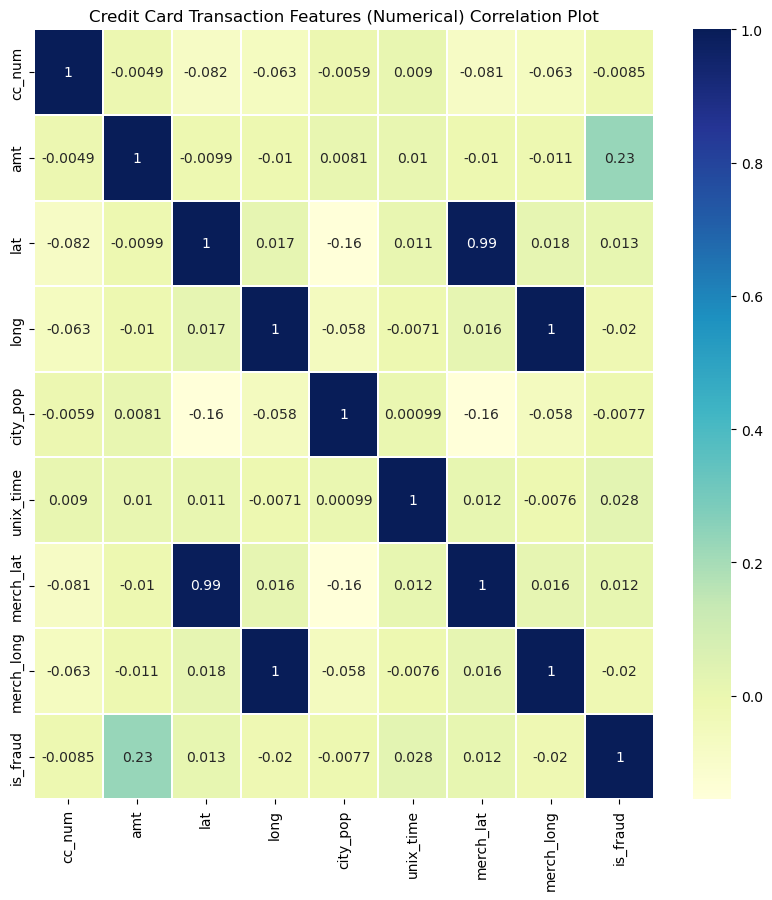

In [11]:
# Selecting only numerical columns
numerical_columns = ['cc_num', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df2 = data[numerical_columns]

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Credit Card Transaction Features (Numerical) Correlation Plot')
sns.heatmap(df2.corr(), annot=True, linewidths=.1, cmap="YlGnBu")
plt.show()

We can see from the heatmap that **'amount'** is the **MOST** closely related to **'is_fraud'**. Overall, the correlations seem rather weak and the raw data will **NOT** be very useful in building our model. We will thus have to perform feature engineering to generate better features to obtain better results. 

In [12]:
data.loc[df['is_fraud'] == 1].sort_values('amt', ascending=False).head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2026,315807,2020-10-19 13:08:21,213157767990030,fraud_Boyer-Reichert,shopping_net,391.71,Tara,Campbell,F,05050 Rogers Well Apt. 439,Rock Springs,WY,82901,41.606,-109.23,27971,Music therapist,1984-08-01,ab7478a1dae8b1e219e826446cfd48b3,1382188101,41.955683,-110.181627,0


We can see that **Drew Garcia, Male** was scammed with the highest amount of **$186.97**.

<AxesSubplot: title={'center': 'Number of frauds by gender'}, xlabel='gender', ylabel='is_fraud'>

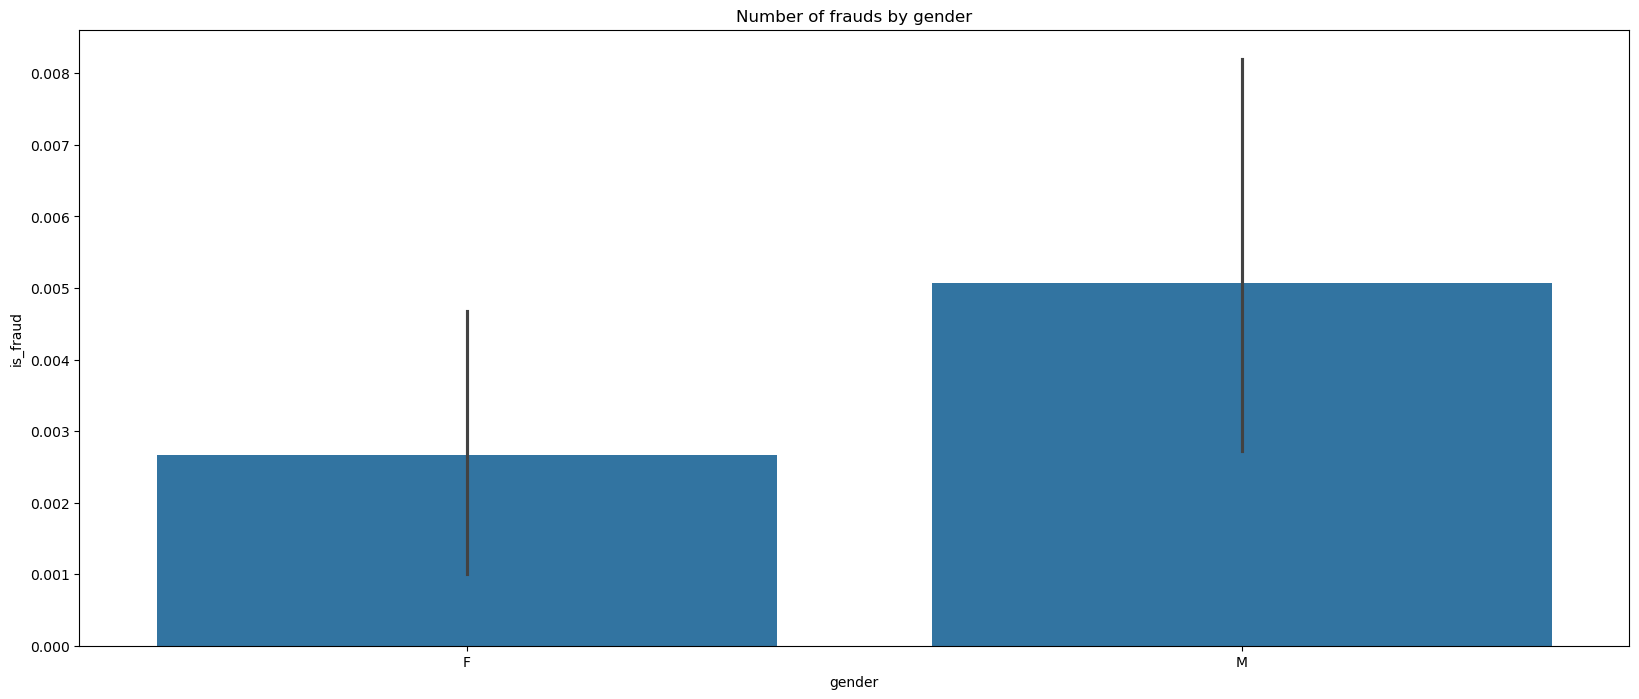

In [13]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sns.barplot(x="gender", y='is_fraud' ,data=data)

From the above barplot diagram we can see that **Males** take up a higher proportion of individuals with fraud transactions.

<AxesSubplot: title={'center': 'Number of frauds by category'}, xlabel='category', ylabel='is_fraud'>

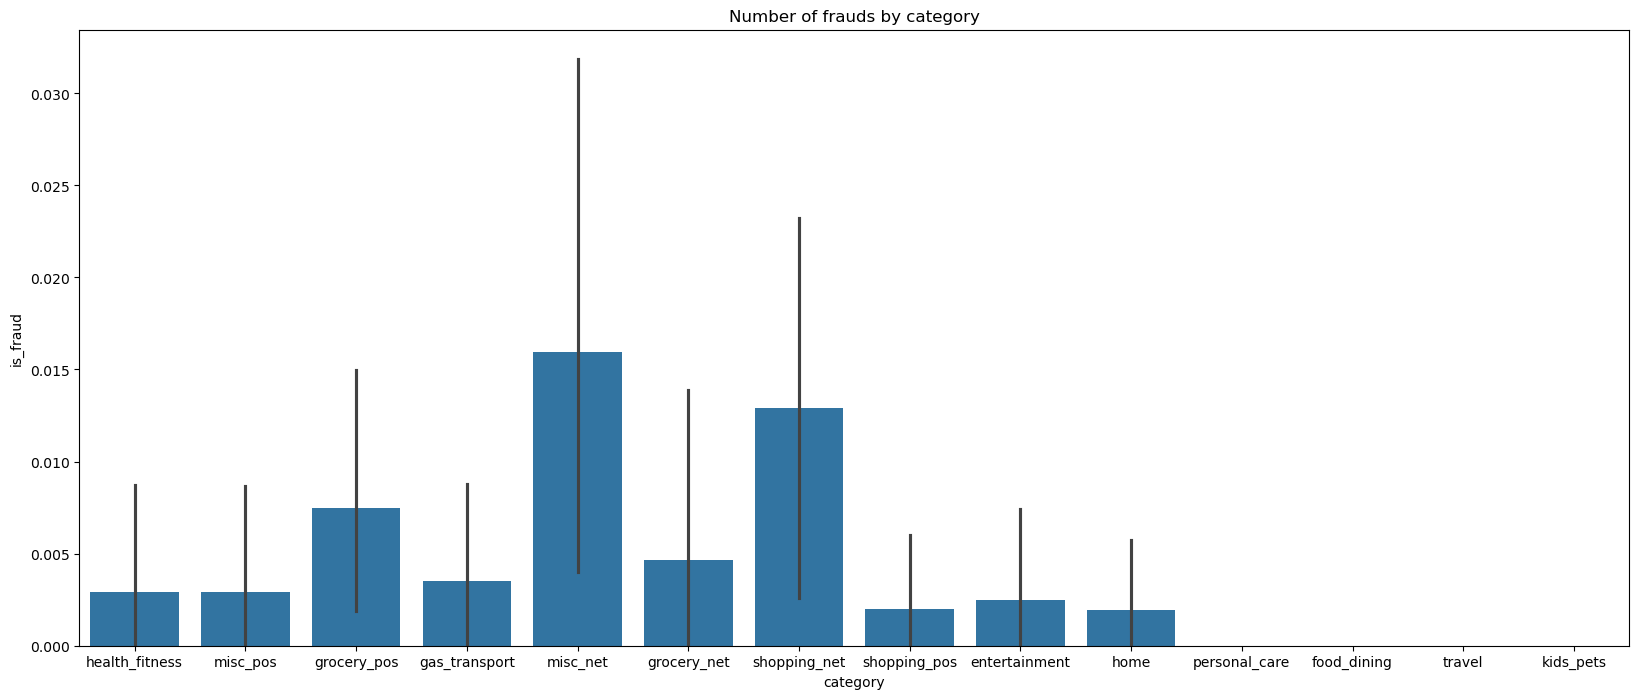

In [14]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=data)

We can also see that the category with the **MOST** number of fraudulant transactions is **misc_net**

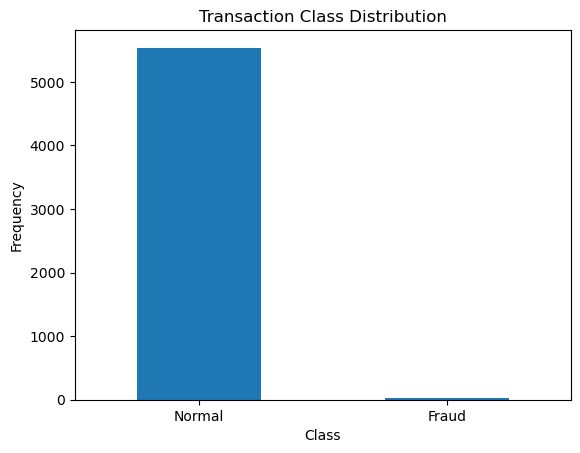

In [15]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

We can observe the huge imbalance in data in terms of the variable **'is_fraud'**. We will work on resolving the imbalance issue later using different techniques.

**We will now look at the distributions of some of the CATEGORICAL variables, Gender and Job as the number of unique values are not too high**

<AxesSubplot: xlabel='gender'>

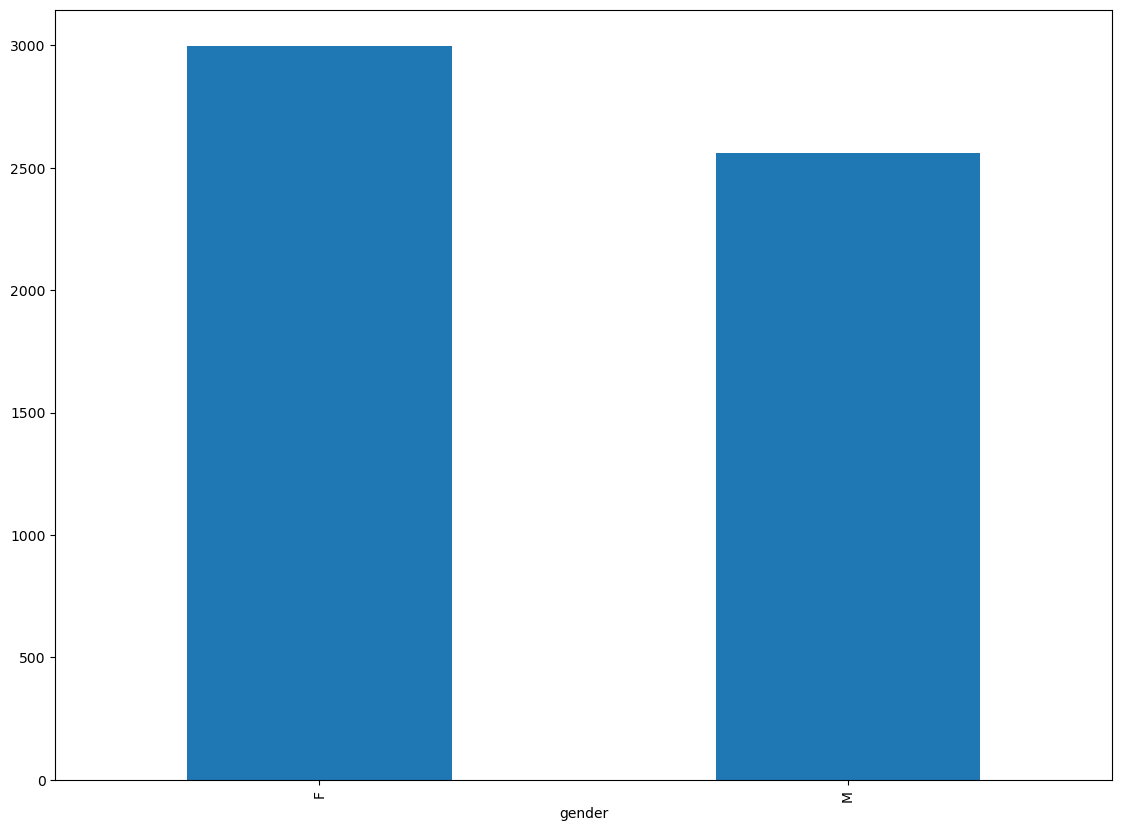

In [16]:
# Distribution of Gender
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
data['gender'].value_counts().plot.bar()

In [17]:
# Specifics
gender = data[['gender','trans_num']].groupby(['gender']).count().reset_index()
gender.columns = ['Gender', 'Total Count']
gender['Percentage'] = (gender['Total Count']/gender['Total Count'].sum())*100
gender

,Gender,Total Count,Percentage
0,F,2996,53.913982
1,M,2561,46.086018


So we can see that there is a greater proportion of the people carrying out the transactions who are **Females**

In [18]:
# In relation to is_fraud
genderf = data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
genderf.columns = ['Gender','is_fraud','Count']
genderf = genderf.merge(gender[['Gender','Total Count']])
genderf['Percentage'] = (genderf['Count']/genderf['Total Count'].sum())*100
genderf

,Gender,is_fraud,Count,Total Count,Percentage
0,F,0,2988,2996,26.885010
1,F,1,8,2996,0.071981
2,M,0,2548,2561,22.926039
3,M,1,13,2561,0.116970


<AxesSubplot: xlabel='category'>

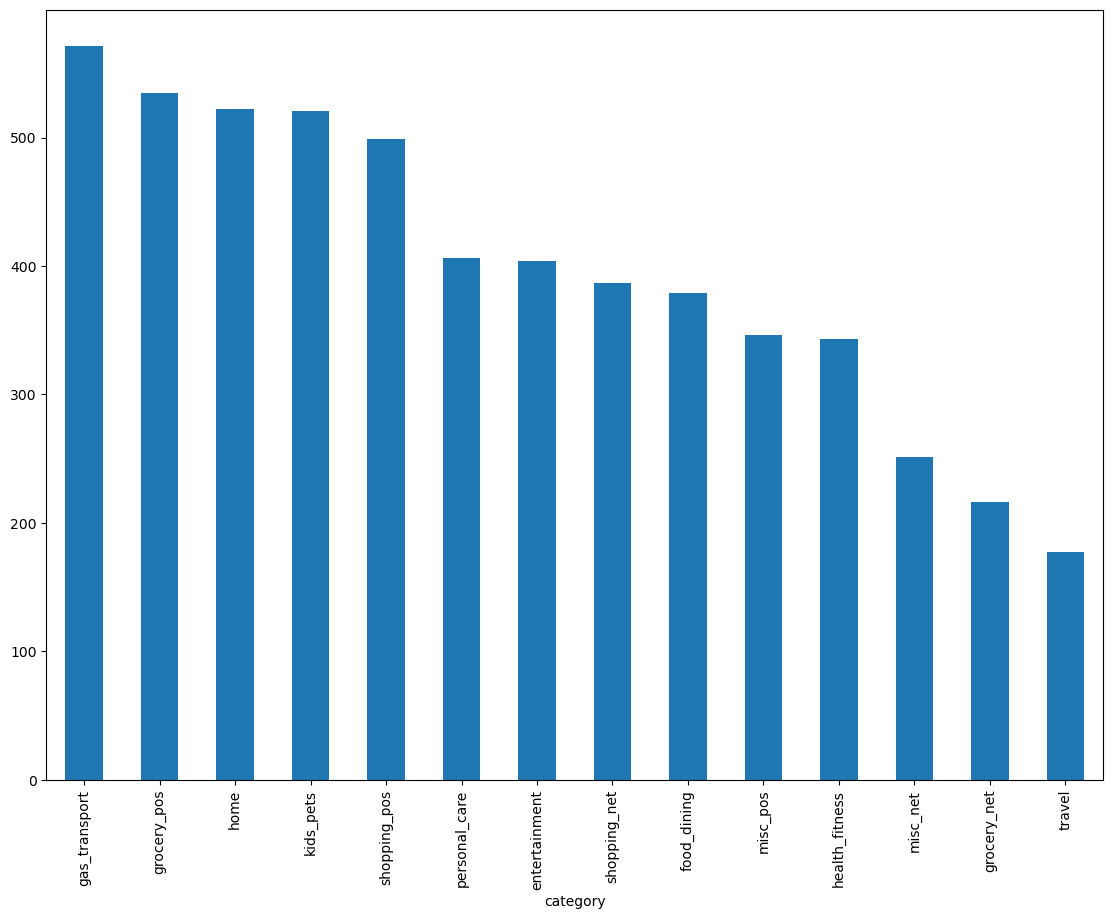

In [19]:
# Distribution of category
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
data['category'].value_counts().plot.bar()

In [20]:
# Specifics
category = data[['category','trans_num']].groupby(['category']).count().reset_index()
category.columns = ['Category', 'Total Count']
category['Percentage'] = (category['Total Count']/category['Total Count'].sum())*100
category.sort_values(by = ['Percentage'], ascending=False).reset_index()
category

,Category,Total Count,Percentage
0,entertainment,404,7.270110
1,food_dining,379,6.820227
2,gas_transport,571,10.275328
3,grocery_net,216,3.886989
4,grocery_pos,535,9.627497
5,health_fitness,343,6.172395
6,home,522,9.393558
7,kids_pets,521,9.375562
8,misc_net,251,4.516826
9,misc_pos,346,6.226381


So we can see that **entertainment** has the highest count amount the rest of the categories

In [21]:
# In relation to is_fraud
categoryf = data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
categoryf.columns = ['Category','is_fraud','Count']
categoryf = categoryf.merge(category[['Category','Total Count']])
categoryf['Percentage'] = (categoryf['Count']/genderf['Total Count'].sum())*100
categoryf

,Category,is_fraud,Count,Total Count,Percentage
0,entertainment,0,403,404,3.626057
1,entertainment,1,1,404,0.008998
2,food_dining,0,379,379,3.410113
3,gas_transport,0,569,571,5.119669
4,gas_transport,1,2,571,0.017995
5,grocery_net,0,215,216,1.934497
6,grocery_net,1,1,216,0.008998
7,grocery_pos,0,531,535,4.777758
8,grocery_pos,1,4,535,0.035991
9,health_fitness,0,342,343,3.077200


We will now visualise the **numerical variables** in the dataset.

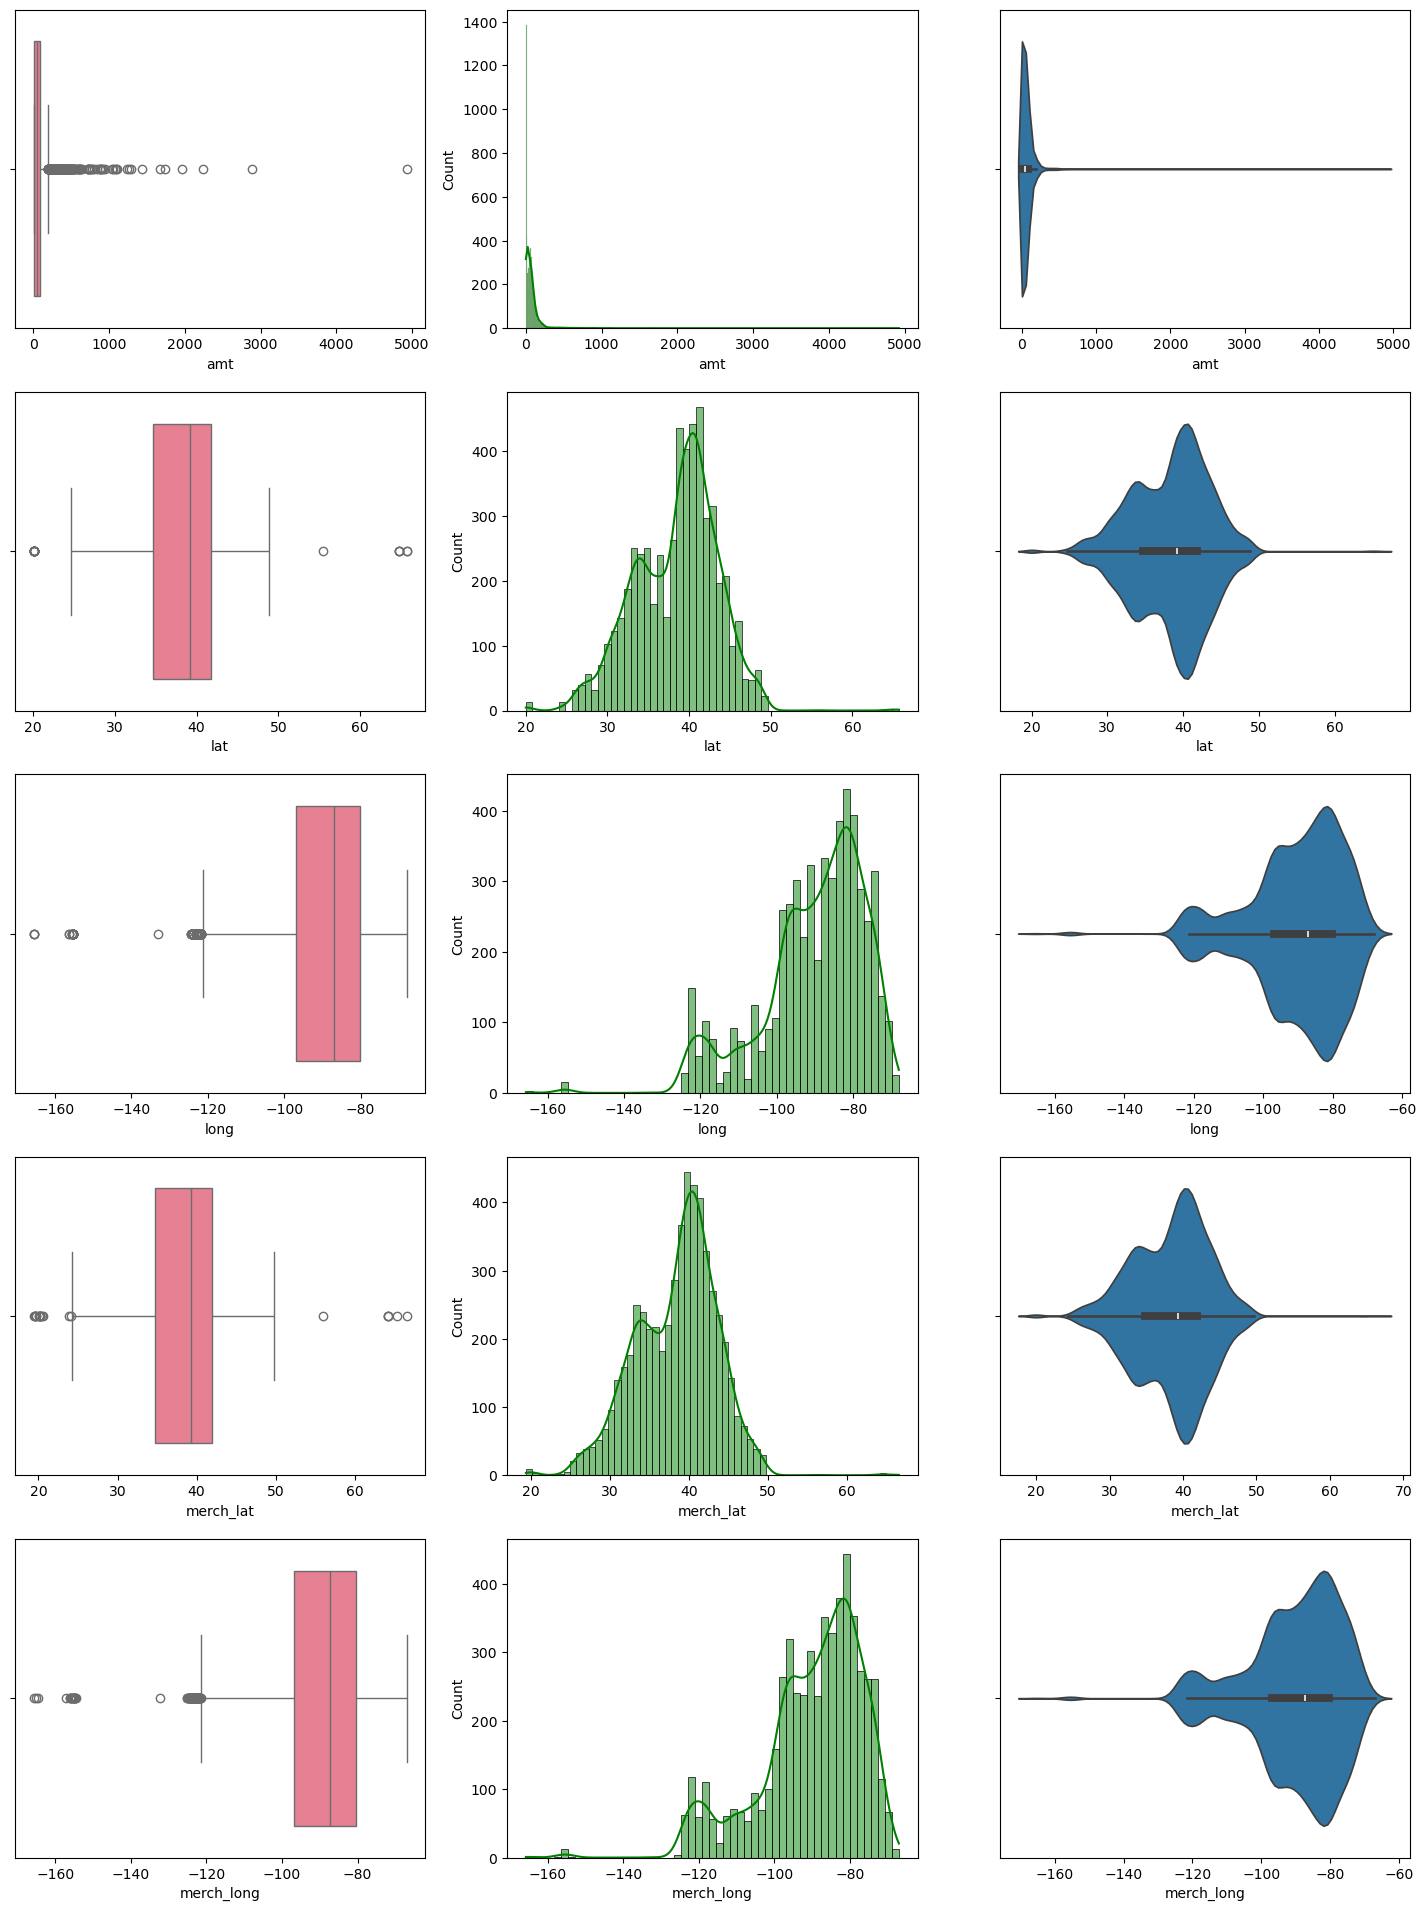

In [22]:
# BEFORE removing outliers
data_numeric = data[['amt', 'lat', 'long', 'merch_lat', 'merch_long']]
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in data_numeric:
    sns.boxplot(data = data_numeric[var], orient = "h", ax = axes[count,0], palette='husl')
    sns.histplot(data = data_numeric[var], ax = axes[count,1], kde = True, color='green')
    sns.violinplot(data = data_numeric[var], orient = "h", ax = axes[count,2])
    count += 1

We can see that there are some outliers, **HOWEVER** we **SHOULD NOT** remove such outliers. These outliers arise **NOT because of measurement error** but they are **NATURAL OUTLIERS** due to the nature of our dataset.

In [23]:
# Rough Statistics for Amount
pd.concat(
[data['amt'].describe(percentiles = [0.25,0.5,0.75])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.25,0.5,0.75])\
.reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.25,0.5,0.75])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,5557.000000,5536.000000,21.000000
1,mean,67.772104,65.938949,551.026667
2,std,129.433379,124.157264,376.474278
3,min,1.000000,1.000000,7.950000
4,25%,9.460000,9.440000,273.420000
5,50%,47.670000,47.430000,714.170000
6,75%,84.290000,83.872500,876.630000
7,max,4925.210000,4925.210000,1098.480000


## Feature Engineering

As we have noticed earlier, we have to generate a few features to help us to obtain a better model.

*(Aggregation process of 2 variables is EXTREMELY slow so avoid that)*

We are able to create new variables to further simplify the variable 'trans_date_trans_time'. The new variables are 
1. **'week_num'**, **'month_num'** and **'year'** for date and 
    **hour**, **minute** and **second** for time.


2. **Hour Encoding**: Normal (0500-2100) | Abnormal (2100-0500) //The hour of the day of the transaction


3. **Frequency of Transactions** in last 1, 7, 30 days from each of the card ids (cc_num)
    - Aggregate by **'cc_num'** 
    - Aggregate by **'merchant'** 


4. **Time since last transaction** from each of the card ids  (cc_num)
    - Aggregate by **'cc_num'** 
    - Aggregate by **'merchant'** 
    
    
5. **Age** (Obtain from transaction date and DOB)


6. **Gender** (One-hot encoding)


7. **Distance** (From lat and long)


8. **Category** (One-hot encoding)

We will also remove the column **'Unnamed: 0'** which represents the index.

## 1. Time and Date

In [24]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
# Column week number
data['week_number'] = data['trans_date_trans_time'].dt.dayofweek
assert data['week_number'].max() == 6
# Column month number
data['month_number'] = data['trans_date_trans_time'].dt.month
assert data['month_number'].max() == 12
# Column year
data['year'] = data['trans_date_trans_time'].dt.year
# Column hours
data['hour'] = data['trans_date_trans_time'].dt.hour
# Column minutes
data['minute'] = data['trans_date_trans_time'].dt.minute
# Column seconds
data['second'] = data['trans_date_trans_time'].dt.second
#Remove the 'trans_date_trans_time' variable
data = data.drop(columns='Unnamed: 0')
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second
0,2020-10-18 23:01:50,378904938837132,fraud_Thompson-Gleason,health_fitness,18.21,Tina,Zimmerman,F,3595 Susan Island Suite 063,Thomas,OK,73669,35.7382,-98.7388,1675,Barrister,1986-05-01,0f9a8998ad94898b82c89200795a0868,1382137310,34.919206,-98.250885,1,6,10,2020,23,1,50
1,2020-08-07 00:03:32,376445266762684,fraud_Spencer-Runolfsson,misc_pos,714.17,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,NE,69165,41.1558,-101.1360,1789,Insurance broker,1982-02-11,4153c58ec1c1ed7567afe299b8477137,1375833812,40.886500,-100.286657,1,4,8,2020,0,3,32
2,2020-11-27 22:48:26,3587044315915002,fraud_Pacocha-O'Reilly,grocery_pos,308.30,Christian,Roman,M,495 Fisher Throughway,Grand Junction,TN,38039,35.0659,-89.1534,1804,Clothing/textile technologist,1974-10-15,c420c16b38dc1ece17c93ddcf6a43311,1385592506,35.422800,-90.122880,1,4,11,2020,22,48,26
3,2020-12-08 02:28:24,213180742685905,fraud_Kunze Inc,grocery_pos,335.21,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,fa1c14fb78b764646b4af936f8511042,1386469704,41.067689,-124.228124,1,1,12,2020,2,28,24
4,2020-11-10 03:28:32,4103158249977,fraud_Friesen-D'Amore,gas_transport,7.95,Christopher,Adkins,M,3512 Knight Center,Lorenzo,TX,79343,33.6666,-101.5277,1571,Petroleum engineer,1982-06-27,8ca4ee94b70484f6397a95109dd6375c,1384054112,33.601008,-102.476514,1,1,11,2020,3,28,32


## 2. Hour Encoding

In [25]:
# Create a new copy of original dataset before adding the new features
data_new = data

In [26]:
# We use one hot encoding here
data_new['hourEnc'] = 0
data_new.loc[data_new.hour < 5,'hourEnc'] = 1
data_new.loc[data_new.hour > 21,'hourEnc'] = 1

In [27]:
data_new.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second,hourEnc
0,2020-10-18 23:01:50,378904938837132,fraud_Thompson-Gleason,health_fitness,18.21,Tina,Zimmerman,F,3595 Susan Island Suite 063,Thomas,OK,73669,35.7382,-98.7388,1675,Barrister,1986-05-01,0f9a8998ad94898b82c89200795a0868,1382137310,34.919206,-98.250885,1,6,10,2020,23,1,50,1
1,2020-08-07 00:03:32,376445266762684,fraud_Spencer-Runolfsson,misc_pos,714.17,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,NE,69165,41.1558,-101.1360,1789,Insurance broker,1982-02-11,4153c58ec1c1ed7567afe299b8477137,1375833812,40.886500,-100.286657,1,4,8,2020,0,3,32,1
2,2020-11-27 22:48:26,3587044315915002,fraud_Pacocha-O'Reilly,grocery_pos,308.30,Christian,Roman,M,495 Fisher Throughway,Grand Junction,TN,38039,35.0659,-89.1534,1804,Clothing/textile technologist,1974-10-15,c420c16b38dc1ece17c93ddcf6a43311,1385592506,35.422800,-90.122880,1,4,11,2020,22,48,26,1
3,2020-12-08 02:28:24,213180742685905,fraud_Kunze Inc,grocery_pos,335.21,Kayla,Sutton,F,010 Weaver Land,Carlotta,CA,95528,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,fa1c14fb78b764646b4af936f8511042,1386469704,41.067689,-124.228124,1,1,12,2020,2,28,24,1
4,2020-11-10 03:28:32,4103158249977,fraud_Friesen-D'Amore,gas_transport,7.95,Christopher,Adkins,M,3512 Knight Center,Lorenzo,TX,79343,33.6666,-101.5277,1571,Petroleum engineer,1982-06-27,8ca4ee94b70484f6397a95109dd6375c,1384054112,33.601008,-102.476514,1,1,11,2020,3,28,32,1


## 3. Frequency of Transactions

**NOTE** that we will be doing aggregation by **'cc_num'**

In [28]:
def last1DayTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_day').sort_index()
    count_1_day = temp.rolling('1d').count() - 1
    count_1_day.index = temp.values
    x['count_1_day'] = count_1_day.reindex(x.index)
    return x
def last7DaysTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_days').sort_index()
    count_7_days = temp.rolling('7d').count() - 1
    count_7_days.index = temp.values
    x['count_7_days'] = count_7_days.reindex(x.index)
    return x
def last30DaysTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_days').sort_index()
    count_30_days = temp.rolling('30d').count() - 1
    count_30_days.index = temp.values
    x['count_30_days'] = count_30_days.reindex(x.index)
    return x

In [29]:
data_new = data_new.groupby('cc_num').apply(last1DayTransCount).reset_index(drop=True)
data_new = data_new.groupby('cc_num').apply(last7DaysTransCount).reset_index(drop=True)
data_new = data_new.groupby('cc_num').apply(last30DaysTransCount).reset_index(drop=True)

In [30]:
data_new.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second,hourEnc,count_1_day,count_7_days,count_30_days
0,2020-06-29 15:14:52,60416207185,fraud_Collier LLC,home,65.91,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,726c3dfd3adfd09f6a81bc27df0537f6,1372518892,43.315636,-109.199031,0,0,6,2020,15,14,52,0,0.0,0.0,0.0
1,2020-12-06 13:19:50,60416207185,fraud_Monahan-Morar,personal_care,42.00,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,a44ccc6d99b8b4eeede940609ebddde2,1386335990,43.847865,-108.648630,0,6,12,2020,13,19,50,0,0.0,1.0,2.0
2,2020-12-12 23:45:40,60416207185,fraud_Quitzon-Goyette,home,153.88,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,35ca2271389ac5ff4c45e3b71e088529,1386891940,42.036492,-108.862079,0,5,12,2020,23,45,40,1,0.0,1.0,3.0
3,2020-12-31 05:16:50,60416207185,fraud_Heller-Abshire,grocery_net,44.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,cc80a9cb68fc3df7e4bac548ca6b7f04,1388467010,43.014302,-109.025973,0,3,12,2020,5,16,50,0,0.0,0.0,4.0
4,2020-12-23 18:06:27,60416207185,"fraud_Lakin, Ferry and Beatty",food_dining,12.09,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,45c96fbbc9bd82994e9f21493f602639,1387821987,42.801425,-108.874168,0,2,12,2020,18,6,27,0,0.0,0.0,3.0


**NOTE** that we will try a different aggregation. By **'merchant'**.

In [31]:
def last1DayMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_merch_day').sort_index()
    count_1_merch_day = temp.rolling('1d').count() - 1
    count_1_merch_day.index = temp.values
    x['count_1_merch_day'] = count_1_merch_day.reindex(x.index)
    return x
def last7DaysMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_merch_days').sort_index()
    count_7_merch_days = temp.rolling('7d').count() - 1
    count_7_merch_days.index = temp.values
    x['count_7_merch_days'] = count_7_merch_days.reindex(x.index)
    return x
def last30DaysMerchTransCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_merch_days').sort_index()
    count_30_merch_days = temp.rolling('30d').count() - 1
    count_30_merch_days.index = temp.values
    x['count_30_merch_days'] = count_30_merch_days.reindex(x.index)
    return x

In [32]:
data_new = data_new.groupby('merchant').apply(last1DayMerchTransCount).reset_index(drop=True)
data_new = data_new.groupby('merchant').apply(last7DaysMerchTransCount).reset_index(drop=True)
data_new = data_new.groupby('merchant').apply(last30DaysMerchTransCount).reset_index(drop=True)

In [33]:
data_new.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second,hourEnc,count_1_day,count_7_days,count_30_days,count_1_merch_day,count_7_merch_days,count_30_merch_days
0,2020-09-17 04:50:43,580954173374,fraud_Abbott-Rogahn,entertainment,50.96,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,NY,10548,41.2496,-73.9446,3487,Race relations officer,1960-01-13,eda89ab0f02e31e7c71382cb03e84cd2,1379393443,42.129973,-74.647285,0,3,9,2020,4,50,43,1,0.0,0.0,0.0,0.0,0.0,1.0
1,2020-12-24 21:23:08,630484879808,fraud_Abbott-Rogahn,entertainment,76.41,Ian,Patton,M,8088 Sherman Radial Suite 689,Helm,CA,93627,36.4992,-120.0936,123,Early years teacher,1973-02-07,f6c16a191906e25459cc13141849b417,1387920188,37.387651,-119.395010,0,3,12,2020,21,23,8,0,0.0,1.0,3.0,0.0,1.0,4.0
2,2020-12-21 15:55:37,30143713661454,fraud_Abbott-Rogahn,entertainment,11.20,Nicholas,Thornton,M,5270 Megan Burg Suite 756,Halma,MN,56729,48.6669,-96.5969,140,"Embryologist, clinical",1942-01-06,db1327c5c967020fa4d54201e94e9fe9,1387641337,48.713453,-96.048065,0,0,12,2020,15,55,37,0,0.0,0.0,0.0,0.0,0.0,3.0
3,2020-08-20 15:22:02,213112402583773,fraud_Abbott-Rogahn,entertainment,107.02,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,4859a38c6b4cdae51d40b06a9d290af6,1377012122,33.439019,-81.615237,0,3,8,2020,15,22,2,0,0.0,0.0,3.0,0.0,0.0,0.0
4,2020-10-07 21:15:40,2252055259910912,fraud_Abbott-Rogahn,entertainment,63.04,Jason,Hernandez,M,220 Frank Gardens,Hewitt,WI,54441,44.6437,-90.1031,828,Arts development officer,1991-08-19,76740ed7ad29b010681d6186d3da27a9,1381180540,44.234471,-90.975427,0,2,10,2020,21,15,40,0,0.0,0.0,1.0,0.0,0.0,2.0


## 4. Time Since Last Transaction (Recency)

In [34]:
def timeDifference(x):
    x['time_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x

In [35]:
data_new = data_new.groupby('cc_num').apply(timeDifference).reset_index(drop=True)
data_new['time_diff'] = data_new['time_diff'].dt.seconds

In [36]:
data_new.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second,hourEnc,count_1_day,count_7_days,count_30_days,count_1_merch_day,count_7_merch_days,count_30_merch_days,time_diff
0,2020-06-29 15:14:52,60416207185,fraud_Collier LLC,home,65.91,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,726c3dfd3adfd09f6a81bc27df0537f6,1372518892,43.315636,-109.199031,0,0,6,2020,15,14,52,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2020-09-08 15:00:17,60416207185,"fraud_Douglas, Schneider and Turner",shopping_pos,3.19,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,f4c17f2dc296b585f2f382ab036c016a,1378652417,43.132599,-109.476821,0,1,9,2020,15,0,17,0,0.0,0.0,0.0,0.0,0.0,2.0,85525.0
2,2020-12-31 05:16:50,60416207185,fraud_Heller-Abshire,grocery_net,44.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,cc80a9cb68fc3df7e4bac548ca6b7f04,1388467010,43.014302,-109.025973,0,3,12,2020,5,16,50,0,0.0,0.0,4.0,0.0,1.0,2.0,51393.0
3,2020-12-01 22:14:19,60416207185,fraud_Hermann and Sons,shopping_pos,6.55,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,834f32045cc25c1ee96bb78f054d07ae,1385936059,43.648512,-109.134238,0,1,12,2020,22,14,19,1,0.0,0.0,1.0,0.0,0.0,1.0,61049.0
4,2020-12-23 18:06:27,60416207185,"fraud_Lakin, Ferry and Beatty",food_dining,12.09,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,45c96fbbc9bd82994e9f21493f602639,1387821987,42.801425,-108.874168,0,2,12,2020,18,6,27,0,0.0,0.0,3.0,0.0,0.0,0.0,71528.0


We will observe some **NULL** values. This is because x.trans_date_trans_time.shift() does not have certain values. As such, they are displayed as NaN when we apply Python's **.shift( )**. We will replace those NaN values with the numerical value '0'.

In [37]:
data_new = data_new.fillna(0)
data_new.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
week_number              0
month_number             0
year                     0
hour                     0
minute                   0
second                   0
hourEnc                  0
count_1_day              0
count_7_days             0
count_30_days            0
count_1_merch_day        0
count_7_merch_days       0
count_30_merch_days      0
time_diff                0
dtype: int64

## 5. Obtaining 'age'

**NOTE** we are finding the age at that point in time. **NOT** current datetime. So we will take transaction datetime to subtract date of birth

In [38]:
# Convert 'dob' to datetime
data_new['dob'] = pd.to_datetime(data_new['dob'])
data_new['trans_date_trans_time'] = pd.to_datetime(data_new['trans_date_trans_time'])

# Calculate age in years
data_new['age'] = np.round((data_new['trans_date_trans_time'] - data_new['dob']).dt.total_seconds() / (365.25 * 24 * 60 * 60))

## 6. Gender One-Hot Encoding

We can do further feature engineering. In the case of gender, since there are only two possible values Male or Female, we can do **One-hot Encoding**. After transformation, **Male = 1** and **Female = 0**.

In [39]:
def gender_encode(x):
    if x=='F':
        return 0
    if x=='M':
        return 1
    
data_new['gender'] = data_new['gender'].transform(gender_encode)

## 7. Distance 

Latitudes and longitudes of the credit card holder and merchant can be combined to create a new variable **'distance'** 

In [40]:
def calculate_Distance(row):
    distance = haversine((row['merch_lat'], row['merch_long']), (row['lat'], row['long']), unit=Unit.MILES)
    return distance

In [41]:
data_new['distance'] = data_new.apply(lambda row: calculate_Distance(row), axis=1)

## 8. Category

From the information on the dataset done during EDA, there are **14** unique values under the variable **'Category'**. As there arent many unique values, we can afford to do one-hot encoding. We do one-hot encoding as it is Nominal Data which cannot work a model so we have to change it to numerical. 

In [42]:
# Assuming data_new is your DataFrame and 'category' is the column to be one-hot encoded
category_onehot = pd.get_dummies(data_new['category'], prefix='category', dtype=int)

# Join the one-hot encoded columns back to the original DataFrame
data_new = data_new.join(category_onehot)

In [43]:
data_new.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year,hour,minute,second,hourEnc,count_1_day,count_7_days,count_30_days,count_1_merch_day,count_7_merch_days,count_30_merch_days,time_diff,age,distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2020-06-29 15:14:52,60416207185,fraud_Collier LLC,home,65.91,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,726c3dfd3adfd09f6a81bc27df0537f6,1372518892,43.315636,-109.199031,0,0,6,2020,15,14,52,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,26.341734,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2020-09-08 15:00:17,60416207185,"fraud_Douglas, Schneider and Turner",shopping_pos,3.19,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,f4c17f2dc296b585f2f382ab036c016a,1378652417,43.132599,-109.476821,0,1,9,2020,15,0,17,0,0.0,0.0,0.0,0.0,0.0,2.0,85525.0,35.0,30.598554,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2020-12-31 05:16:50,60416207185,fraud_Heller-Abshire,grocery_net,44.27,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,cc80a9cb68fc3df7e4bac548ca6b7f04,1388467010,43.014302,-109.025973,0,3,12,2020,5,16,50,0,0.0,0.0,4.0,0.0,1.0,2.0,51393.0,35.0,6.579367,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2020-12-01 22:14:19,60416207185,fraud_Hermann and Sons,shopping_pos,6.55,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,834f32045cc25c1ee96bb78f054d07ae,1385936059,43.648512,-109.134238,0,1,12,2020,22,14,19,1,0.0,0.0,1.0,0.0,0.0,1.0,61049.0,35.0,46.054718,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2020-12-23 18:06:27,60416207185,"fraud_Lakin, Ferry and Beatty",food_dining,12.09,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,45c96fbbc9bd82994e9f21493f602639,1387821987,42.801425,-108.874168,0,2,12,2020,18,6,27,0,0.0,0.0,3.0,0.0,0.0,0.0,71528.0,35.0,14.096851,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Display and Comparing Correlations (Old vs New)

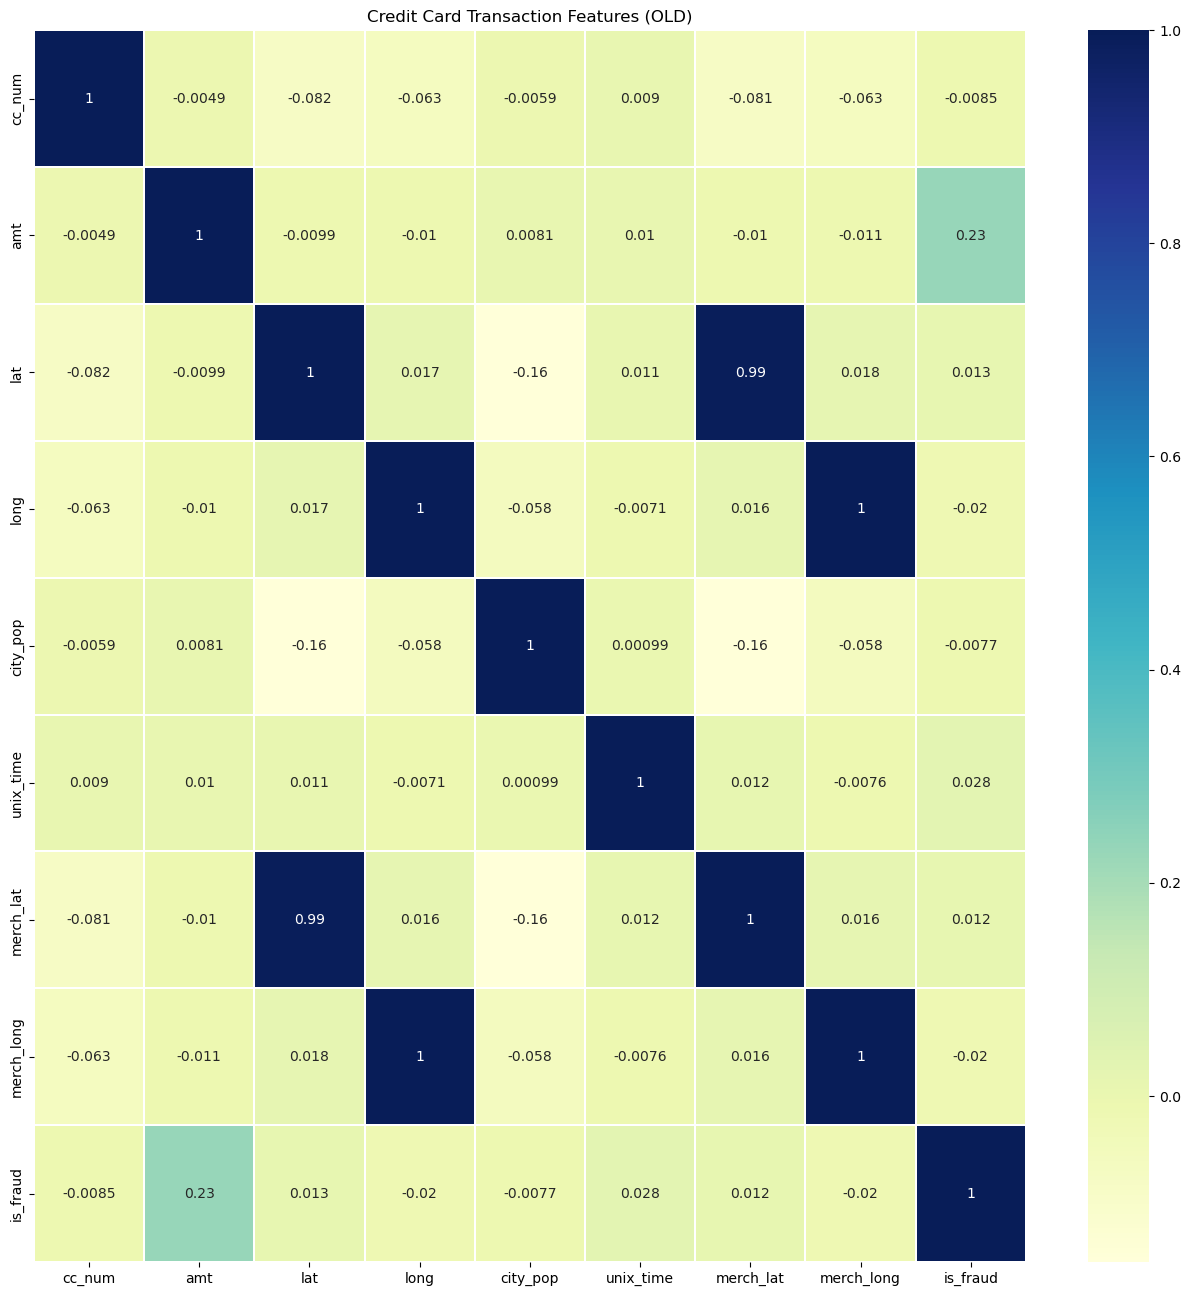

In [44]:
fig, ax = plt.subplots(figsize=(16,16))
plt.title('Credit Card Transaction Features (OLD)')
sns.heatmap(df2.corr(), annot=True, linewidths=.1, cmap="YlGnBu")
plt.show()

We will drop the variable **'year'** in visualising the correlations.

In [45]:
data_new = data_new.drop(columns='year')

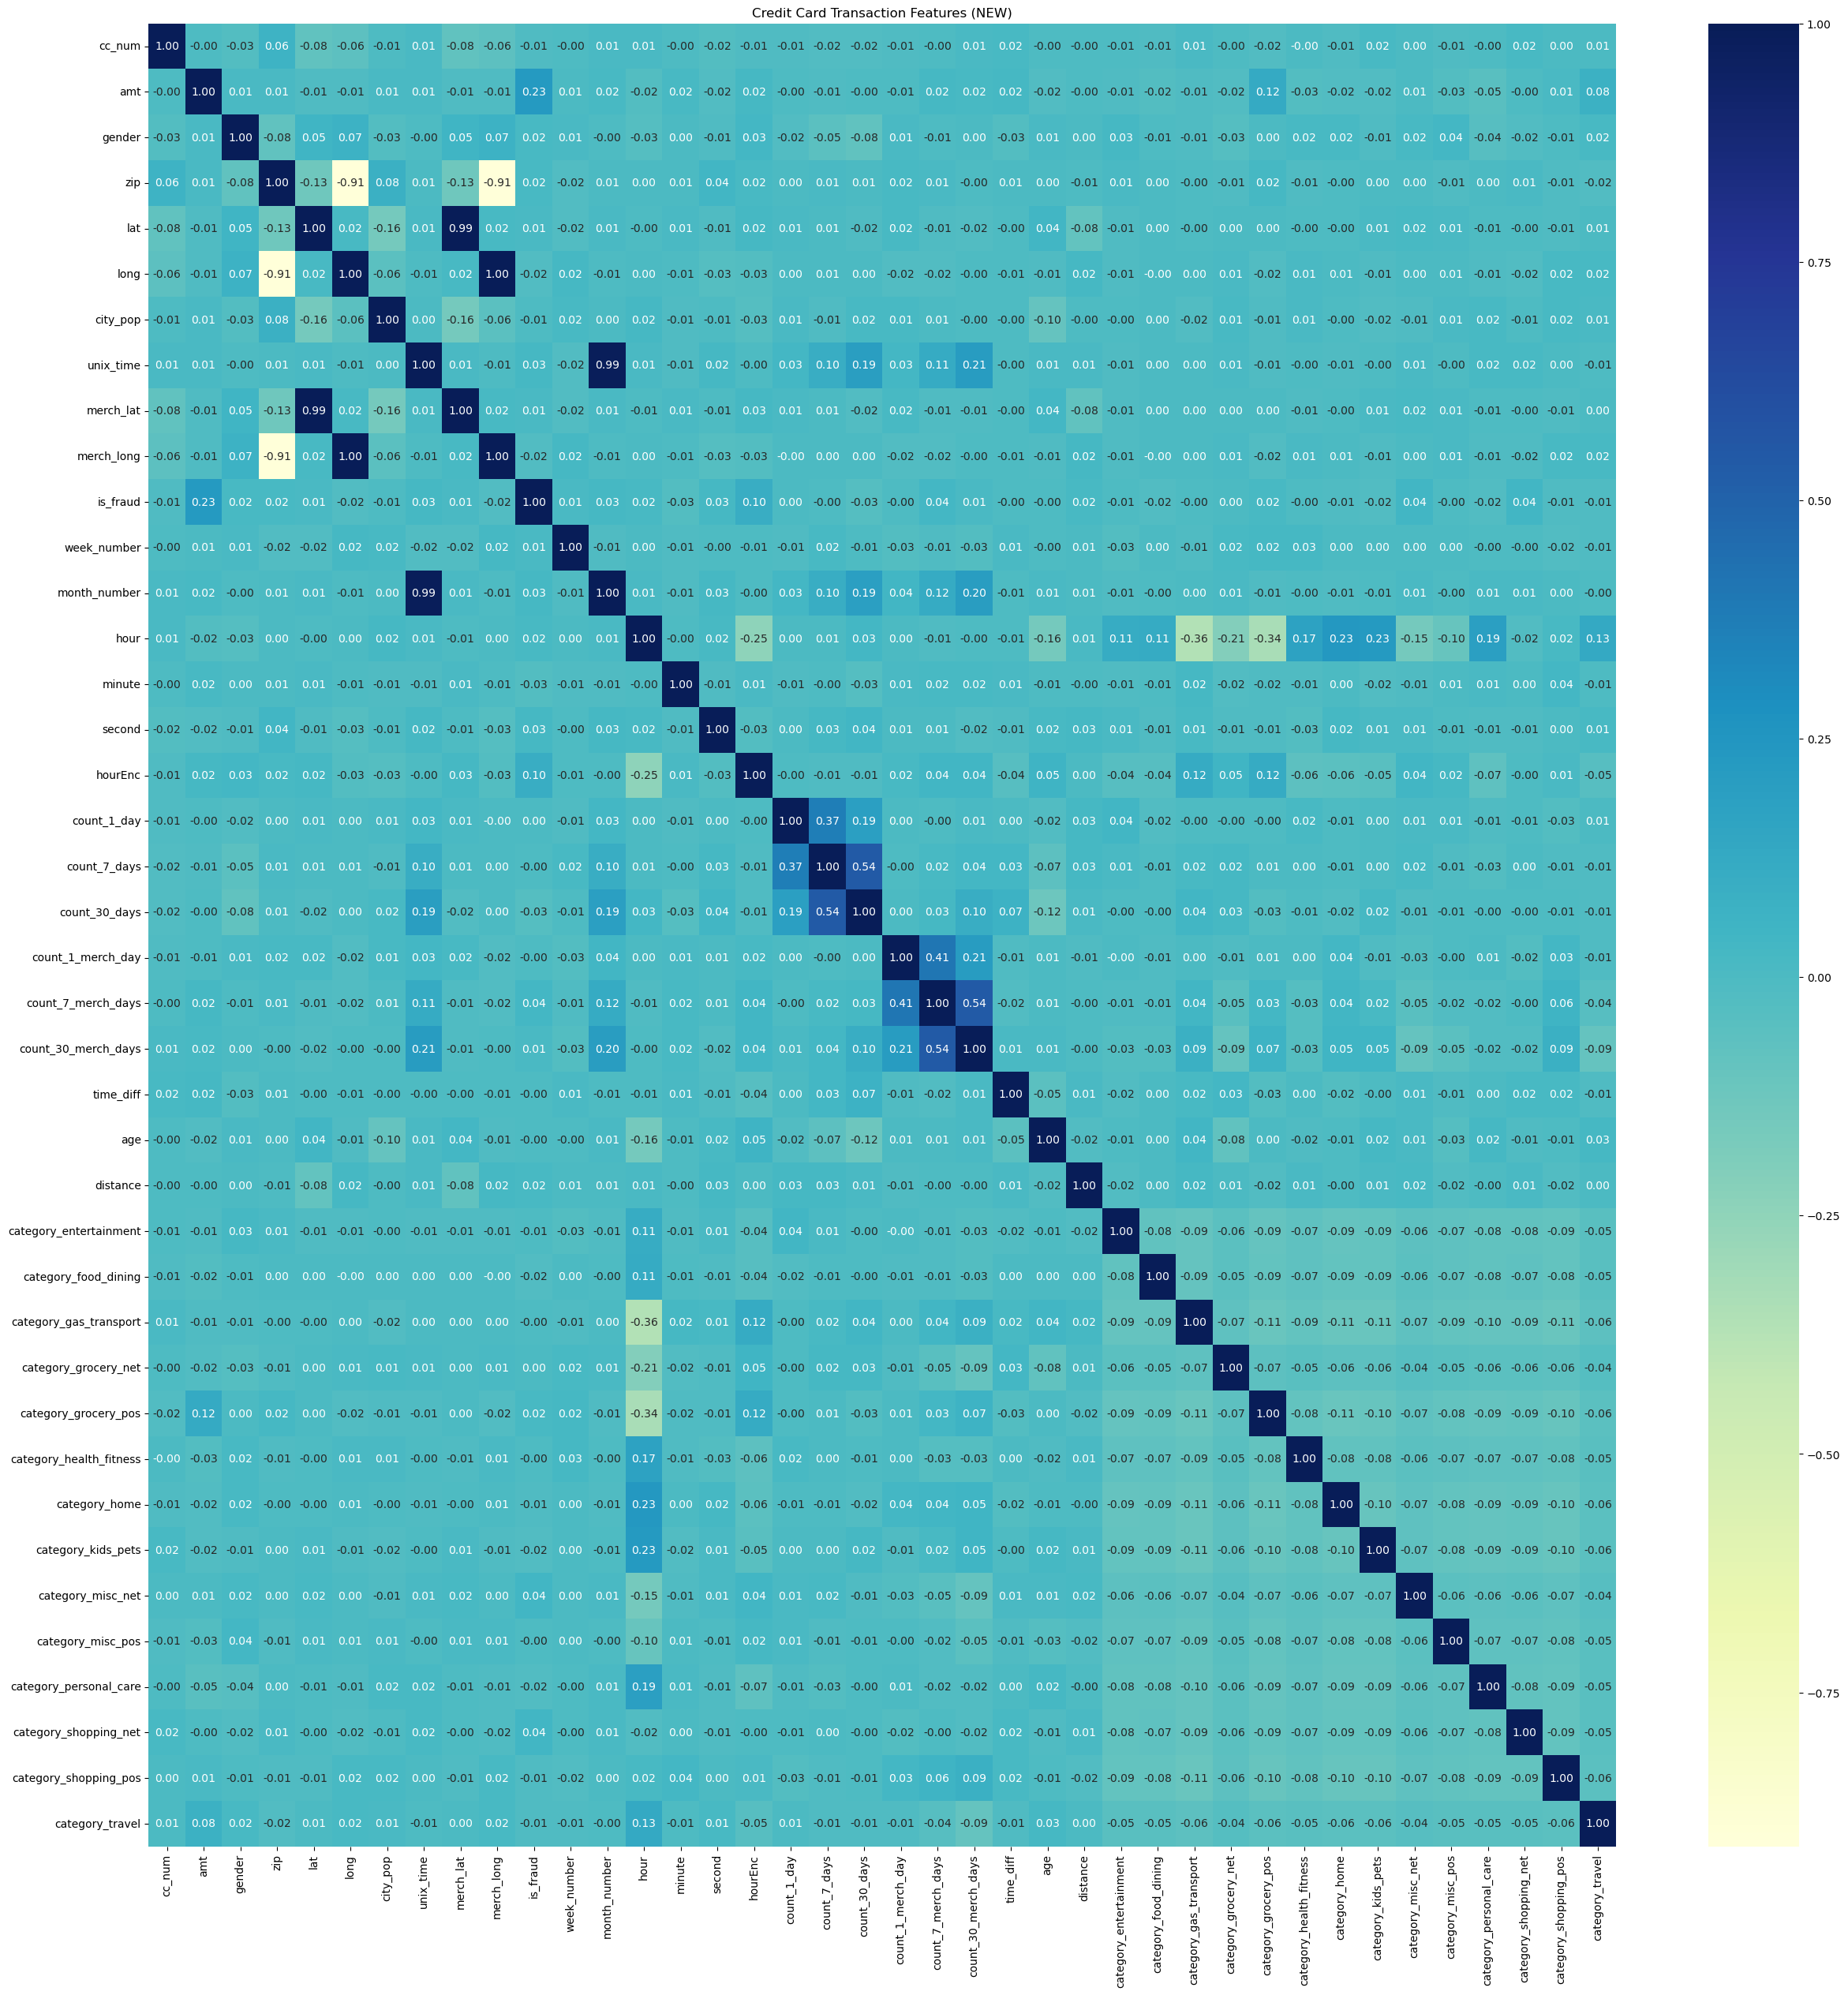

In [46]:
# Ensure 'data_new' contains only numeric columns for correlation
numeric_columns = data_new.select_dtypes(include=[np.number]).columns
corr_matrix = data_new[numeric_columns].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(30, 30))
plt.title('Credit Card Transaction Features (NEW)')
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", ax=ax)
plt.show()

In [47]:
# Select only numeric columns
numeric_data = data_new.select_dtypes(include=[np.number])

# Calculate correlation with 'is_fraud' and sort the values
correlation_with_fraud = numeric_data.corr()['is_fraud'].abs().sort_values(ascending=False)
correlation_with_fraud

is_fraud                   1.000000
amt                        0.229975
hourEnc                    0.103269
category_misc_net          0.043094
category_shopping_net      0.040760
count_7_merch_days         0.035540
count_30_days              0.030542
month_number               0.028685
unix_time                  0.027940
second                     0.027621
minute                     0.025217
distance                   0.020067
category_kids_pets         0.019810
merch_long                 0.019799
long                       0.019695
category_grocery_pos       0.019669
gender                     0.019546
hour                       0.017971
category_personal_care     0.017291
category_food_dining       0.016663
zip                        0.016350
lat                        0.012808
merch_lat                  0.012439
week_number                0.012349
count_30_merch_days        0.011692
category_travel            0.011171
category_home              0.009778
category_shopping_pos      0

We can see that some of the new variables have managed to result in a **higher correlation** with **'is_fraud'**. As such, with this information, we can better extract variables to be used in building the detection model. 

# Train-Test Split

We want to do the train-test split now as we want to include more variables and perform further data transformation on it. Specifically **label encoding** on **'merchant'** and **'job'**. As such we have to perform train-test split first to **PREVENT DATA LEAKAGE**. Furthermore, we have to resolve the class imbalance on the **'is_fraud'** variable as well. 

In [96]:
data = data_new

In [97]:
df = data.drop(['is_fraud'], axis =1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,week_number,month_number,hour,minute,second,hourEnc,count_1_day,count_7_days,count_30_days,count_1_merch_day,count_7_merch_days,count_30_merch_days,time_diff,age,distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2020-06-29 15:14:52,60416207185,fraud_Collier LLC,home,65.91,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,726c3dfd3adfd09f6a81bc27df0537f6,1372518892,43.315636,-109.199031,0,6,15,14,52,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,26.341734,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2020-09-08 15:00:17,60416207185,"fraud_Douglas, Schneider and Turner",shopping_pos,3.19,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,f4c17f2dc296b585f2f382ab036c016a,1378652417,43.132599,-109.476821,1,9,15,0,17,0,0.0,0.0,0.0,0.0,0.0,2.0,85525.0,35.0,30.598554,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2020-12-31 05:16:50,60416207185,fraud_Heller-Abshire,grocery_net,44.27,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,cc80a9cb68fc3df7e4bac548ca6b7f04,1388467010,43.014302,-109.025973,3,12,5,16,50,0,0.0,0.0,4.0,0.0,1.0,2.0,51393.0,35.0,6.579367,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2020-12-01 22:14:19,60416207185,fraud_Hermann and Sons,shopping_pos,6.55,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,834f32045cc25c1ee96bb78f054d07ae,1385936059,43.648512,-109.134238,1,12,22,14,19,1,0.0,0.0,1.0,0.0,0.0,1.0,61049.0,35.0,46.054718,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2020-12-23 18:06:27,60416207185,"fraud_Lakin, Ferry and Beatty",food_dining,12.09,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,45c96fbbc9bd82994e9f21493f602639,1387821987,42.801425,-108.874168,2,12,18,6,27,0,0.0,0.0,3.0,0.0,0.0,0.0,71528.0,35.0,14.096851,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
#split dataset into train and test

X = pd.DataFrame(df)
y = pd.DataFrame(data['is_fraud'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

## Merchant (LE)

In [100]:
# Train data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train = X_train['merchant']
X_train['merchant_number'] = label_encoder.fit_transform(train)

# Test data
test = X_test['merchant']
X_test['merchant_number'] = label_encoder.fit_transform(test)

print('Merchant Number of train dataset',X_train['merchant_number'])
print('Merchant Number of test dataset',X_test['merchant_number'])

Merchant Number of train dataset 2322    379
1310    381
2266    380
4816    499
4324    368
       ... 
4171     98
599     263
1361    617
1547     80
4959    393
Name: merchant_number, Length: 3889, dtype: int64
Merchant Number of test dataset 4746    349
1250     62
54      456
4618    192
5352    104
       ... 
1851    609
790     223
2858    576
823     552
1237    474
Name: merchant_number, Length: 1668, dtype: int64


## Job (LE)

In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Train data
train = X_train['job']
X_train['job_number'] = label_encoder.fit_transform(train)
print(X_train['job_number'])

# Test data
test = X_test['job']
X_test['job_number'] = label_encoder.fit_transform(test)
print(X_test['job_number'])

2322    294
1310    454
2266    252
4816    248
4324    310
       ... 
4171    144
599     285
1361    264
1547    370
4959    151
Name: job_number, Length: 3889, dtype: int64
4746    109
1250    282
54      133
4618    131
5352    167
       ... 
1851    360
790      68
2858    252
823     253
1237    164
Name: job_number, Length: 1668, dtype: int64


We now want to see the correlation that **Merchant** and **Job** has on **is_fraud**. We will be using the train test set to visualise it.

In [102]:
xtemp = X_train
ytemp = y_train
m_train = pd.concat([xtemp, pd.DataFrame(ytemp)], axis=1)
m_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,week_number,month_number,hour,minute,second,hourEnc,count_1_day,count_7_days,count_30_days,count_1_merch_day,count_7_merch_days,count_30_merch_days,time_diff,age,distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,job_number,is_fraud
2322,2020-12-22 01:47:09,2229378226512508,fraud_Lesch Ltd,shopping_pos,169.28,Thomas,Hale,1,949 Smith Parkway,Cazenovia,WI,53924,43.4987,-90.2796,1360,Occupational hygienist,1984-11-06,5e59790632c77ddff257a47e53bb4296,1387676829,43.732940,-90.614126,1,12,1,47,9,1,0.0,0.0,0.0,0.0,0.0,2.0,29475.0,36.0,23.279898,0,0,0,0,0,0,0,0,0,0,0,0,1,0,379,294,0
1310,2020-08-12 00:43:57,38295635583927,"fraud_Lind, Huel and McClure",gas_transport,70.02,Candice,Brown,0,9412 Harris Mews,O Brien,TX,79539,33.3749,-99.8473,178,Warden/ranger,1983-06-14,13060dad1ef728078689a210620fcfec,1376268237,32.646543,-98.926165,2,8,0,43,57,1,0.0,0.0,0.0,0.0,0.0,2.0,17831.0,37.0,73.354229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,381,454,0
2266,2020-12-03 04:31:11,377895991033232,"fraud_Lesch, D'Amore and Brown",food_dining,33.49,Kimberly,Myers,0,6881 King Isle Suite 228,Higganum,CT,6441,41.4682,-72.5751,5438,"Librarian, academic",1964-11-17,c4db647d8a6399d39618ac910fc602bf,1386045071,40.532031,-72.546355,3,12,4,31,11,1,0.0,0.0,2.0,0.0,0.0,0.0,69811.0,56.0,64.700481,0,1,0,0,0,0,0,0,0,0,0,0,0,0,380,252,0
4816,2020-08-22 10:57:18,6011693194885790,"fraud_Reilly, Heaney and Cole",gas_transport,51.99,Victoria,Fleming,0,2807 Parker Station Suite 080,Stanchfield,MN,55080,45.6675,-93.2433,2607,"Lecturer, further education",1995-12-04,ca7e0c1615b693d819d96da8291aa1c4,1377169038,45.717641,-92.779526,5,8,10,57,18,0,0.0,1.0,2.0,0.0,0.0,3.0,52649.0,25.0,22.649296,0,0,1,0,0,0,0,0,0,0,0,0,0,0,499,248,0
4324,2020-08-26 00:34:06,4740713119940984,fraud_Larson-Moen,entertainment,197.39,Heather,Hines,0,13776 Hicks Plains,Pomona,NY,10970,41.1901,-74.0436,9993,Pensions consultant,1962-10-16,76c8948b7f12b50c4dc06cd2e5c30ecd,1377477246,40.932796,-73.396550,2,8,0,34,6,1,0.0,0.0,0.0,0.0,0.0,1.0,58196.0,58.0,38.109837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,368,310,0


In [103]:
m_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3889 entries, 2322 to 4959
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trans_date_trans_time    3889 non-null   datetime64[ns]
 1   cc_num                   3889 non-null   int64         
 2   merchant                 3889 non-null   object        
 3   category                 3889 non-null   object        
 4   amt                      3889 non-null   float64       
 5   first                    3889 non-null   object        
 6   last                     3889 non-null   object        
 7   gender                   3889 non-null   int64         
 8   street                   3889 non-null   object        
 9   city                     3889 non-null   object        
 10  state                    3889 non-null   object        
 11  zip                      3889 non-null   int64         
 12  lat                      3889 non-nu

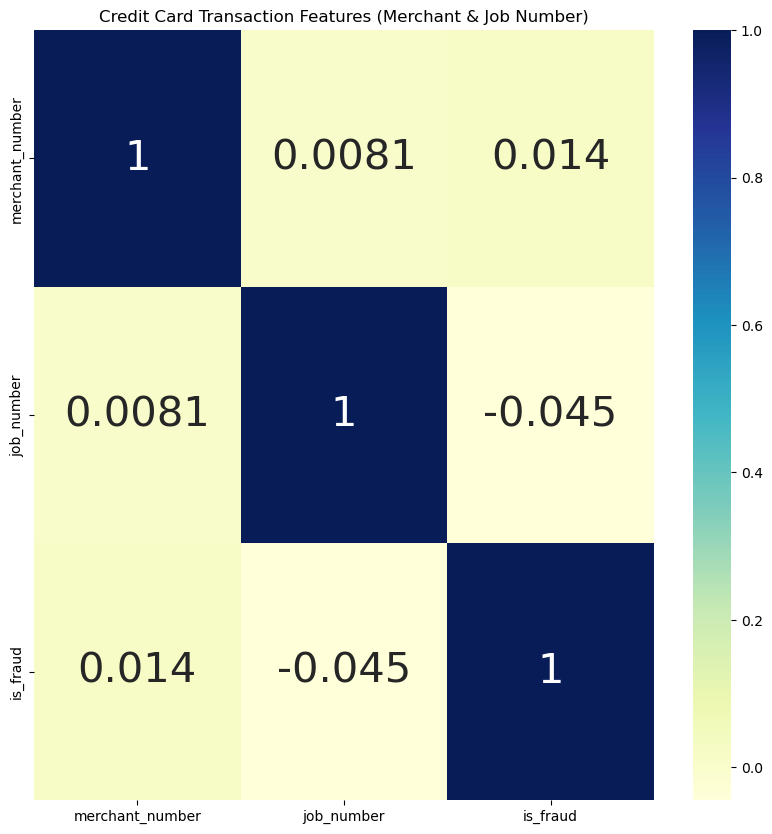

In [104]:
corrdata = m_train[['merchant_number','job_number', 'is_fraud']]
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Credit Card Transaction Features (Merchant & Job Number)')
sns.heatmap(corrdata.corr(),annot=True,annot_kws={"size":30}, cmap="YlGnBu")
plt.show()

In [105]:
numeric_data = m_train.select_dtypes(include=[np.number])
numeric_data

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,week_number,month_number,hour,minute,second,hourEnc,count_1_day,count_7_days,count_30_days,count_1_merch_day,count_7_merch_days,count_30_merch_days,time_diff,age,distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,job_number,is_fraud
2322,2229378226512508,169.28,1,53924,43.4987,-90.2796,1360,1387676829,43.732940,-90.614126,1,12,1,47,9,1,0.0,0.0,0.0,0.0,0.0,2.0,29475.0,36.0,23.279898,0,0,0,0,0,0,0,0,0,0,0,0,1,0,379,294,0
1310,38295635583927,70.02,0,79539,33.3749,-99.8473,178,1376268237,32.646543,-98.926165,2,8,0,43,57,1,0.0,0.0,0.0,0.0,0.0,2.0,17831.0,37.0,73.354229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,381,454,0
2266,377895991033232,33.49,0,6441,41.4682,-72.5751,5438,1386045071,40.532031,-72.546355,3,12,4,31,11,1,0.0,0.0,2.0,0.0,0.0,0.0,69811.0,56.0,64.700481,0,1,0,0,0,0,0,0,0,0,0,0,0,0,380,252,0
4816,6011693194885790,51.99,0,55080,45.6675,-93.2433,2607,1377169038,45.717641,-92.779526,5,8,10,57,18,0,0.0,1.0,2.0,0.0,0.0,3.0,52649.0,25.0,22.649296,0,0,1,0,0,0,0,0,0,0,0,0,0,0,499,248,0
4324,4740713119940984,197.39,0,10970,41.1901,-74.0436,9993,1377477246,40.932796,-73.396550,2,8,0,34,6,1,0.0,0.0,0.0,0.0,0.0,1.0,58196.0,58.0,38.109837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,368,310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,4634955908138648,59.16,0,68031,41.6414,-96.5232,1745,1374970498,40.794175,-96.214006,1,7,0,14,58,1,0.0,0.0,2.0,0.0,0.0,1.0,0.0,47.0,60.703194,0,0,1,0,0,0,0,0,0,0,0,0,0,0,98,144,0
599,4500002361389,3.05,1,21865,38.2833,-75.8465,470,1374122059,38.526348,-76.660842,5,7,4,34,19,1,0.0,0.0,1.0,0.0,0.0,1.0,70986.0,55.0,47.181537,0,0,0,0,0,0,0,0,1,0,0,0,0,0,263,285,0
1361,180011453250192,119.19,1,61272,41.2153,-90.9879,1504,1386740408,41.682954,-90.545951,4,12,5,40,8,0,0.0,0.0,1.0,0.0,0.0,1.0,76360.0,27.0,39.596694,0,0,0,0,0,0,0,0,0,0,0,0,1,0,617,264,0
1547,213112402583773,66.36,0,29819,34.0326,-82.2027,1523,1378498268,33.346412,-82.211277,6,9,20,11,8,0,0.0,0.0,4.0,0.0,0.0,3.0,37432.0,36.0,47.413639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,80,370,0


In [106]:
numeric_data.drop(columns=['cc_num','zip','unix_time','lat','long','merch_lat','merch_long','hour','job_number'],inplace=True)

In [107]:
numeric_data

,amt,gender,city_pop,week_number,month_number,minute,second,hourEnc,count_1_day,count_7_days,count_30_days,count_1_merch_day,count_7_merch_days,count_30_merch_days,time_diff,age,distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,is_fraud
2322,169.28,1,1360,1,12,47,9,1,0.0,0.0,0.0,0.0,0.0,2.0,29475.0,36.0,23.279898,0,0,0,0,0,0,0,0,0,0,0,0,1,0,379,0
1310,70.02,0,178,2,8,43,57,1,0.0,0.0,0.0,0.0,0.0,2.0,17831.0,37.0,73.354229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,381,0
2266,33.49,0,5438,3,12,31,11,1,0.0,0.0,2.0,0.0,0.0,0.0,69811.0,56.0,64.700481,0,1,0,0,0,0,0,0,0,0,0,0,0,0,380,0
4816,51.99,0,2607,5,8,57,18,0,0.0,1.0,2.0,0.0,0.0,3.0,52649.0,25.0,22.649296,0,0,1,0,0,0,0,0,0,0,0,0,0,0,499,0
4324,197.39,0,9993,2,8,34,6,1,0.0,0.0,0.0,0.0,0.0,1.0,58196.0,58.0,38.109837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,59.16,0,1745,1,7,14,58,1,0.0,0.0,2.0,0.0,0.0,1.0,0.0,47.0,60.703194,0,0,1,0,0,0,0,0,0,0,0,0,0,0,98,0
599,3.05,1,470,5,7,34,19,1,0.0,0.0,1.0,0.0,0.0,1.0,70986.0,55.0,47.181537,0,0,0,0,0,0,0,0,1,0,0,0,0,0,263,0
1361,119.19,1,1504,4,12,40,8,0,0.0,0.0,1.0,0.0,0.0,1.0,76360.0,27.0,39.596694,0,0,0,0,0,0,0,0,0,0,0,0,1,0,617,0
1547,66.36,0,1523,6,9,11,8,0,0.0,0.0,4.0,0.0,0.0,3.0,37432.0,36.0,47.413639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0


In [108]:
numeric_data.corr()['is_fraud'].abs().sort_values(ascending=False).head(15)

is_fraud                  1.000000
amt                       0.234138
hourEnc                   0.114061
category_shopping_net     0.058283
count_7_merch_days        0.046937
category_misc_net         0.039448
minute                    0.033646
month_number              0.031386
gender                    0.028674
count_30_days             0.028489
second                    0.023823
category_kids_pets        0.021879
distance                  0.021382
category_entertainment    0.019536
category_personal_care    0.019212
Name: is_fraud, dtype: float64

Based on the correlations obtained from the train set, we will select the **TOP 10** variables with the highest correlation. The variables are as such, 
**'is_fraud will be the y (response variable), 'amt', 'time_diff', 'time_merch_diff', 'hourEnc', 'category_misc_net', 'category_shopping_net', 'count_30_days', 'hour', 'count_7_days', 'gender'.**

# Feature Selection

The features that we have selected for building the model are below. **They are ALL numerical**.

In [109]:
top_columns = numeric_data.corr()['is_fraud'].abs().sort_values(ascending=False).head(15).index
top_columns = top_columns.drop('is_fraud').tolist()

top_columns

['amt',
 'hourEnc',
 'category_shopping_net',
 'count_7_merch_days',
 'category_misc_net',
 'minute',
 'month_number',
 'gender',
 'count_30_days',
 'second',
 'category_kids_pets',
 'distance',
 'category_entertainment',
 'category_personal_care']

In [110]:
X_train = X_train[top_columns]
X_test = X_test[top_columns]

In [111]:
X_train.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care
2322,169.28,1,0,0.0,0,47,12,1,0.0,9,0,23.279898,0,0
1310,70.02,1,0,0.0,0,43,8,0,0.0,57,0,73.354229,0,0
2266,33.49,1,0,0.0,0,31,12,0,2.0,11,0,64.700481,0,0
4816,51.99,0,0,0.0,0,57,8,0,2.0,18,0,22.649296,0,0
4324,197.39,1,0,0.0,0,34,8,0,0.0,6,0,38.109837,1,0


# Feature Scaling

There is a very pivotal reason as to why we do scaling. Note that in the data there are variables with a **LARGE** range of values such as **'amt'** in comparison to others. The values are also significantly higher. In order to prevent such variables from **dominating** the other variables, we should do feature scaling. 


**Also a side note, as the correlation values are NOT high enough and because we performed one-hot and label encoding for categorical variables, we will NOT be doing Principal Component Analysis (PCA)**


We will be testing 3 methods of scaling, namely **Robust Scaling, MinMax Scaling and Standard Scaling**

In [4]:
# Importing the necessary stuff
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

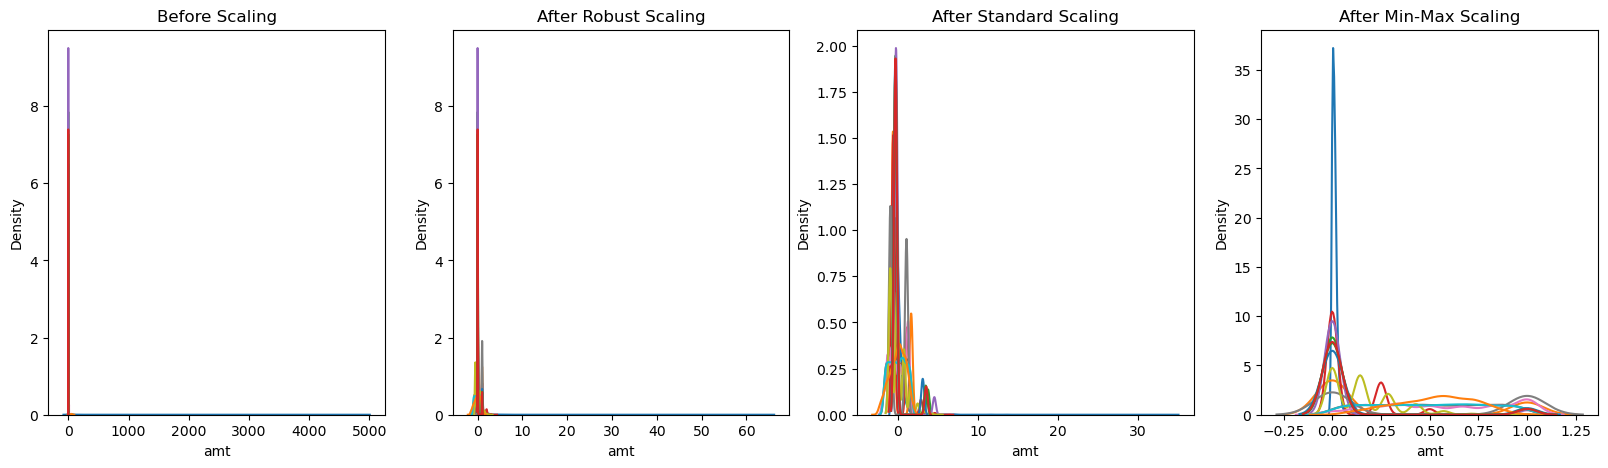

In [113]:
# Select only numeric columns from X_train
numeric_X_train = X_train.select_dtypes(include=[np.number])

# Apply RobustScaler
scaler = RobustScaler()
robust_df = scaler.fit_transform(numeric_X_train)
robust_df = pd.DataFrame(robust_df, columns=numeric_X_train.columns)

# Apply StandardScaler
scaler = StandardScaler()
standard_df = scaler.fit_transform(numeric_X_train)
standard_df = pd.DataFrame(standard_df, columns=numeric_X_train.columns)

# Apply MinMaxScaler
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(numeric_X_train)
minmax_df = pd.DataFrame(minmax_df, columns=numeric_X_train.columns)

# Using KDE plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))

# Original data KDE plots
ax1.set_title('Before Scaling')
columns_to_plot = top_columns

for column in columns_to_plot:
    if column in numeric_X_train.columns:
        sns.kdeplot(X_train[column], ax=ax1)

# RobustScaler KDE plots
ax2.set_title('After Robust Scaling')
for column in columns_to_plot:
    if column in numeric_X_train.columns:
        sns.kdeplot(robust_df[column], ax=ax2)

# StandardScaler KDE plots
ax3.set_title('After Standard Scaling')
for column in columns_to_plot:
    if column in numeric_X_train.columns:
        sns.kdeplot(standard_df[column], ax=ax3)

# MinMaxScaler KDE plots
ax4.set_title('After Min-Max Scaling')
for column in columns_to_plot:
    if column in numeric_X_train.columns:
        sns.kdeplot(minmax_df[column], ax=ax4)

plt.show()

**Min-Max** is sensitive to outliers. **Standard** assumes a normal distribution. **Robust** is robust against outliers. Thus we should go with the **Robust Scaler** considering our natural outliers.

In [114]:
# Transformation using Robust Scaling
scaler = RobustScaler()
trainnew = scaler.fit_transform(X_train)
testnew = scaler.fit_transform(X_test)

In [115]:
X_train = pd.DataFrame(trainnew, columns=X_train.columns)
X_train.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care
0,1.630055,1.0,0.0,0.0,0.0,0.580645,1.000000,1.0,-0.5,-0.724138,0.0,-0.958696,0.0,0.0
1,0.305352,1.0,0.0,0.0,0.0,0.451613,-0.333333,0.0,-0.5,0.931034,0.0,0.895588,0.0,0.0
2,-0.182170,1.0,0.0,0.0,0.0,0.064516,1.000000,0.0,0.5,-0.655172,0.0,0.575134,0.0,0.0
3,0.064727,0.0,0.0,0.0,0.0,0.903226,-0.333333,0.0,0.5,-0.413793,0.0,-0.982048,0.0,0.0
4,2.005205,1.0,0.0,0.0,0.0,0.161290,-0.333333,0.0,-0.5,-0.827586,0.0,-0.409534,1.0,0.0


In [116]:
X_test = pd.DataFrame(testnew, columns=X_test.columns)
X_test.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care
0,0.288206,0.0,0.0,1.0,0.0,-0.066667,0.50,1.0,0.0,0.034483,1.0,-0.246716,0.0,0.0
1,1.084651,0.0,0.0,1.0,0.0,-0.866667,-0.75,0.0,0.0,-0.172414,0.0,0.775100,0.0,0.0
2,0.452227,0.0,0.0,0.0,0.0,-0.766667,-0.75,1.0,-0.5,-0.413793,0.0,-0.711441,0.0,0.0
3,-0.591518,0.0,0.0,0.0,0.0,-0.100000,-0.75,0.0,0.5,0.965517,0.0,-0.213444,0.0,0.0
4,2.284129,0.0,0.0,0.0,0.0,-0.600000,0.00,0.0,1.0,-0.448276,0.0,-0.628234,1.0,0.0


# Resolving the imbalance

In [117]:
print(data_new.groupby('is_fraud').size())

is_fraud
0    5536
1      21
dtype: int64


#### As we noticed before, The Dataset is heavily skewed and severely imbalanced. 
#### Majority (5536 count) belongs to the 'not fraud' category (is_fraud == 0) while only 21 count belongs to 'is fraud' category.
 
we are going to look at 3 techniques to resolve this imbalance:
    
    Method 1: Undersampling
    Method 2: Oversampling
    Method 3: SMOTE

In [118]:
#First we combine back the train-test split to get a full clean and processed dataset

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
dfnew_X = pd.concat([X_train, X_test], ignore_index=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
dfnew_y = pd.concat([y_train, y_test], ignore_index=True)

data_new = pd.concat([dfnew_X, dfnew_y], axis=1)
data_new.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care,is_fraud
0,1.630055,1.0,0.0,0.0,0.0,0.580645,1.000000,1.0,-0.5,-0.724138,0.0,-0.958696,0.0,0.0,0
1,0.305352,1.0,0.0,0.0,0.0,0.451613,-0.333333,0.0,-0.5,0.931034,0.0,0.895588,0.0,0.0,0
2,-0.182170,1.0,0.0,0.0,0.0,0.064516,1.000000,0.0,0.5,-0.655172,0.0,0.575134,0.0,0.0,0
3,0.064727,0.0,0.0,0.0,0.0,0.903226,-0.333333,0.0,0.5,-0.413793,0.0,-0.982048,0.0,0.0,0
4,2.005205,1.0,0.0,0.0,0.0,0.161290,-0.333333,0.0,-0.5,-0.827586,0.0,-0.409534,1.0,0.0,0


In [119]:
#split into X and y
dfy = data_new[['is_fraud']]
dfX = data_new.drop('is_fraud', axis=1)

# 1. Undersample
### Reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class

In [120]:
!pip install imbalanced-learn -q --break-system-packages

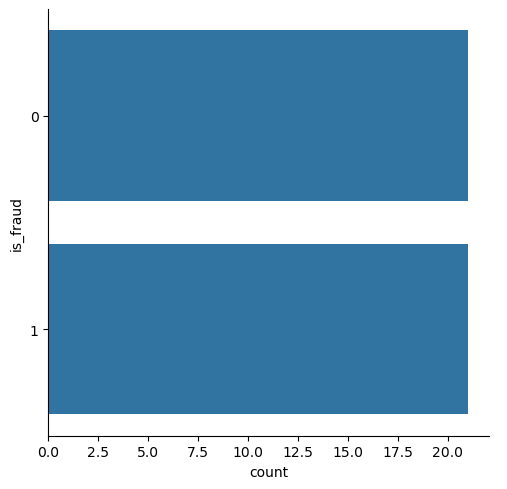

In [121]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_US, y_US = undersample.fit_resample(dfX, dfy)   #dosent work with non numerical values

#number of is_fraud=1 and is_fraud=0 is equal
sns.catplot(y = "is_fraud", data = y_US, kind = "count")

In [122]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_US = pd.concat([X_US, y_US], axis=1)
data_US.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care,is_fraud
2972,0.024156,0.0,0.0,1.0,0.0,0.580645,-0.333333,1.0,0.0,-0.241379,1.0,0.968225,0.0,0.0,0
2003,0.226745,1.0,0.0,2.0,0.0,0.677419,1.000000,1.0,0.0,-0.862069,0.0,-0.131354,0.0,0.0,0
4479,0.043712,1.0,0.0,0.0,0.0,-0.333333,0.250000,0.0,0.0,-0.724138,0.0,1.037536,0.0,0.0,0
1830,-0.208461,0.0,0.0,1.0,0.0,0.129032,1.000000,1.0,0.5,0.586207,0.0,0.192589,0.0,0.0,0
4660,-0.516392,0.0,1.0,0.0,0.0,0.966667,0.000000,0.0,0.0,-0.103448,0.0,0.740284,0.0,0.0,0


In [123]:
#check count
print(data_US.groupby('is_fraud').size())

is_fraud
0    21
1    21
dtype: int64


#### Disadvantage: The deletion of observations in this random manner may lead to the deletion of some very useful information from the dataset

# 2. Oversampling
### Random over-sampling is a technique that randomly samples a number of observations from the minority class (sampling is done with replacement) and adds them to the dataset. 

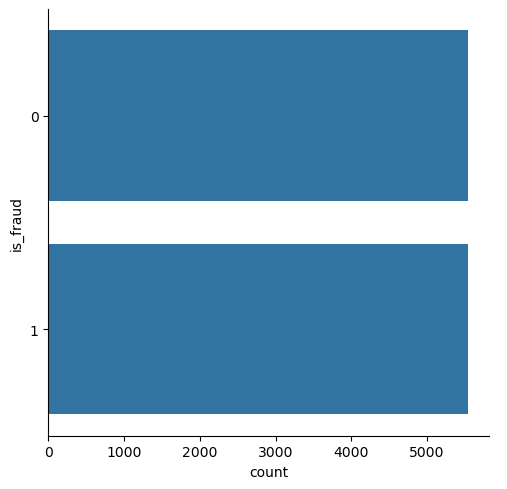

In [124]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OS, y_OS = oversample.fit_resample(dfX, dfy)

#number of is_fraud=1 and is_fraud=0 is equal
sns.catplot(y = "is_fraud", data = y_OS, kind = "count")

In [125]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_OS = pd.concat([X_OS, y_OS], axis=1)
data_OS.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care,is_fraud
0,1.630055,1.0,0.0,0.0,0.0,0.580645,1.000000,1.0,-0.5,-0.724138,0.0,-0.958696,0.0,0.0,0
1,0.305352,1.0,0.0,0.0,0.0,0.451613,-0.333333,0.0,-0.5,0.931034,0.0,0.895588,0.0,0.0,0
2,-0.182170,1.0,0.0,0.0,0.0,0.064516,1.000000,0.0,0.5,-0.655172,0.0,0.575134,0.0,0.0,0
3,0.064727,0.0,0.0,0.0,0.0,0.903226,-0.333333,0.0,0.5,-0.413793,0.0,-0.982048,0.0,0.0,0
4,2.005205,1.0,0.0,0.0,0.0,0.161290,-0.333333,0.0,-0.5,-0.827586,0.0,-0.409534,1.0,0.0,0


In [126]:
#check count
print(data_OS.groupby('is_fraud').size())

is_fraud
0    5536
1    5536
dtype: int64


#### Disadvantage: This technique may increase the chance of model overfitting.

# 3. SMOTE
### SMOTE is a technique that generates new observations by interpolating between observations in the original dataset. Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). 

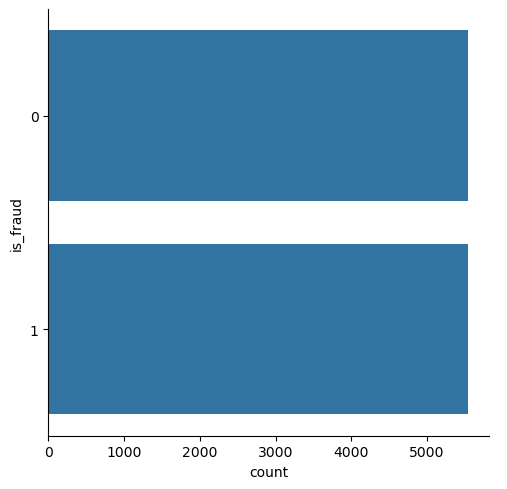

In [127]:
#import SMOTENC (this considers categorical variables and discrete variables, SMOTE only considers discrete variables)
from imblearn.over_sampling import SMOTE

#non numeric
smote = SMOTE()
X_SM, y_SM = smote.fit_resample(dfX, dfy)

#number of is_fraud=1 and is_fraud=0 is equal
sns.catplot(y = "is_fraud", data = y_SM, kind = "count")

In [128]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_SM = pd.concat([X_SM, y_SM], axis=1)
data_SM.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care,is_fraud
0,1.630055,1.0,0.0,0.0,0.0,0.580645,1.000000,1.0,-0.5,-0.724138,0.0,-0.958696,0.0,0.0,0
1,0.305352,1.0,0.0,0.0,0.0,0.451613,-0.333333,0.0,-0.5,0.931034,0.0,0.895588,0.0,0.0,0
2,-0.182170,1.0,0.0,0.0,0.0,0.064516,1.000000,0.0,0.5,-0.655172,0.0,0.575134,0.0,0.0,0
3,0.064727,0.0,0.0,0.0,0.0,0.903226,-0.333333,0.0,0.5,-0.413793,0.0,-0.982048,0.0,0.0,0
4,2.005205,1.0,0.0,0.0,0.0,0.161290,-0.333333,0.0,-0.5,-0.827586,0.0,-0.409534,1.0,0.0,0


In [129]:
#check count
print(data_SM.groupby('is_fraud').size())

is_fraud
0    5536
1    5536
dtype: int64


How do we decide which method to adopt? Well we can take a look at the correlation between is_fraud and amt after each method through a scatterplot graph.

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care,is_fraud
amt,1.000000,0.443894,0.497145,-0.053684,0.361963,-0.294918,-0.061132,0.113292,-0.206222,0.162008,-0.202497,0.049635,0.039092,-0.025914,0.687731
hourEnc,0.443894,1.000000,0.023033,0.078375,0.246126,-0.272601,0.232592,0.044603,-0.248240,0.151519,-0.214264,0.037344,0.104564,-0.233257,0.669534
category_shopping_net,0.497145,0.023033,1.000000,-0.030934,-0.164399,0.160779,-0.061202,0.258199,0.006887,0.017468,-0.124035,0.080960,-0.069843,-0.069843,0.191663
count_7_merch_days,-0.053684,0.078375,-0.030934,1.000000,-0.010171,0.142717,0.518460,0.289537,-0.113975,-0.074138,0.153478,-0.173021,0.086422,-0.140436,0.069171
category_misc_net,0.361963,0.246126,-0.164399,-0.010171,1.000000,-0.233099,0.089006,0.021224,-0.123407,-0.068347,-0.101956,0.219560,-0.057411,-0.057411,0.220564
minute,-0.294918,-0.272601,0.160779,0.142717,-0.233099,1.000000,0.085815,0.079587,0.159500,-0.010919,0.079560,0.271853,0.190585,-0.095410,-0.379663
month_number,-0.061132,0.232592,-0.061202,0.518460,0.089006,0.085815,1.000000,0.003039,0.000486,0.154161,0.012652,-0.152381,-0.169338,-0.192355,0.101762
gender,0.113292,0.044603,0.258199,0.289537,0.021224,0.079587,0.003039,1.000000,-0.244495,-0.243100,-0.133440,0.090332,0.135250,0.135250,0.096225
count_30_days,-0.206222,-0.248240,0.006887,-0.113975,-0.123407,0.159500,0.000486,-0.244495,1.000000,-0.121428,0.337407,-0.243034,-0.113033,-0.012025,-0.384980
second,0.162008,0.151519,0.017468,-0.074138,-0.068347,-0.010919,0.154161,-0.243100,-0.121428,1.000000,-0.209297,-0.073899,0.175926,-0.326232,0.301540


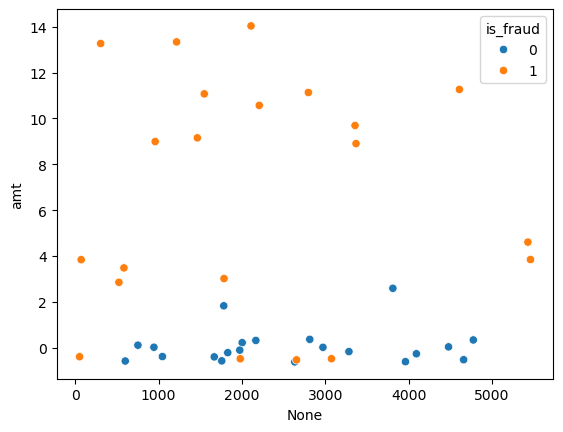

In [130]:
sns.scatterplot(data=data_US, x=data_US.index, y='amt', hue='is_fraud')
data_US.corr()

Correlation between **amt** and **is_fraud** = **0.762971**

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care,is_fraud
amt,1.000000,0.511269,0.543909,0.063106,0.363119,-0.148797,0.075300,0.145047,-0.047474,0.138436,-0.152189,0.130136,-0.079594,-0.141227,0.667163
hourEnc,0.511269,1.000000,0.181130,0.204232,0.184848,-0.143005,0.206647,0.139147,-0.214508,0.169635,-0.198849,0.137403,-0.057194,-0.194756,0.766706
category_shopping_net,0.543909,0.181130,1.000000,0.028018,-0.157274,0.058263,-0.019915,0.284353,0.084471,0.029010,-0.095528,-0.014496,-0.110139,-0.083872,0.239712
count_7_merch_days,0.063106,0.204232,0.028018,1.000000,-0.031175,0.122661,0.293470,0.208446,-0.101536,-0.045627,-0.044868,-0.044065,0.034711,-0.059144,0.247709
category_misc_net,0.363119,0.184848,-0.157274,-0.031175,1.000000,-0.264800,0.048528,-0.031147,-0.141120,-0.042422,-0.081297,0.203580,-0.093732,-0.071378,0.227571
minute,-0.148797,-0.143005,0.058263,0.122661,-0.264800,1.000000,-0.072212,0.066472,0.001852,0.075379,0.031473,0.080550,0.180258,0.042493,-0.193567
month_number,0.075300,0.206647,-0.019915,0.293470,0.048528,-0.072212,1.000000,-0.039044,-0.084015,0.134073,-0.064159,0.034580,-0.130834,-0.042912,0.273847
gender,0.145047,0.139147,0.284353,0.208446,-0.031147,0.066472,-0.039044,1.000000,-0.075947,-0.140263,-0.043657,0.022012,0.087340,-0.059558,0.162585
count_30_days,-0.047474,-0.214508,0.084471,-0.101536,-0.141120,0.001852,-0.084015,-0.075947,1.000000,-0.209781,0.077689,-0.186183,-0.040258,0.050339,-0.272768
second,0.138436,0.169635,0.029010,-0.045627,-0.042422,0.075379,0.134073,-0.140263,-0.209781,1.000000,-0.045442,0.234174,0.077011,-0.056200,0.239297


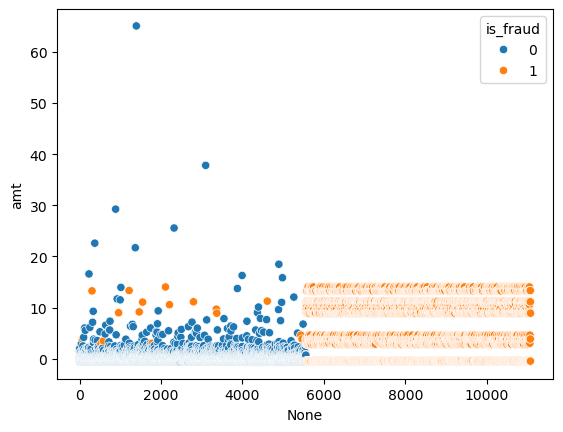

In [131]:
sns.scatterplot(data=data_OS, x=data_OS.index, y='amt', hue='is_fraud')
data_OS.corr()

Correlation between **amt** and **is_fraud** = **0.741037**

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care,is_fraud
amt,1.000000,0.529340,0.504042,0.101701,0.479989,-0.211764,0.177009,0.118004,-0.136669,0.152394,-0.157548,0.176834,-0.098064,-0.146161,0.690743
hourEnc,0.529340,1.000000,0.166700,0.245758,0.237350,-0.167546,0.274981,0.128937,-0.259876,0.198345,-0.198849,0.161952,-0.059527,-0.194756,0.766706
category_shopping_net,0.504042,0.166700,1.000000,0.040497,-0.057170,0.003078,0.032961,0.242965,0.019570,0.008527,-0.096326,0.004776,-0.120689,-0.084573,0.221292
count_7_merch_days,0.101701,0.245758,0.040497,1.000000,-0.070013,0.081014,0.296861,0.172313,-0.097487,0.004057,-0.055553,-0.044181,0.033728,-0.070388,0.300111
category_misc_net,0.479989,0.237350,-0.057170,-0.070013,1.000000,-0.289797,0.066018,-0.032875,-0.126522,-0.003817,-0.098079,0.228864,-0.122886,-0.086113,0.295284
minute,-0.211764,-0.167546,0.003078,0.081014,-0.289797,1.000000,-0.094078,0.006454,0.051992,0.023380,0.037640,-0.012507,0.160976,0.049316,-0.226242
month_number,0.177009,0.274981,0.032961,0.296861,0.066018,-0.094078,1.000000,-0.004303,-0.067101,0.157495,-0.084218,0.049068,-0.102449,-0.059725,0.363231
gender,0.118004,0.128937,0.242965,0.172313,-0.032875,0.006454,-0.004303,1.000000,-0.089645,-0.110250,-0.041006,0.018720,0.062690,-0.059192,0.147522
count_30_days,-0.136669,-0.259876,0.019570,-0.097487,-0.126522,0.051992,-0.067101,-0.089645,1.000000,-0.169151,0.091923,-0.127319,-0.015214,0.061587,-0.331449
second,0.152394,0.198345,0.008527,0.004057,-0.003817,0.023380,0.157495,-0.110250,-0.169151,1.000000,-0.053485,0.163546,0.062046,-0.064480,0.278092


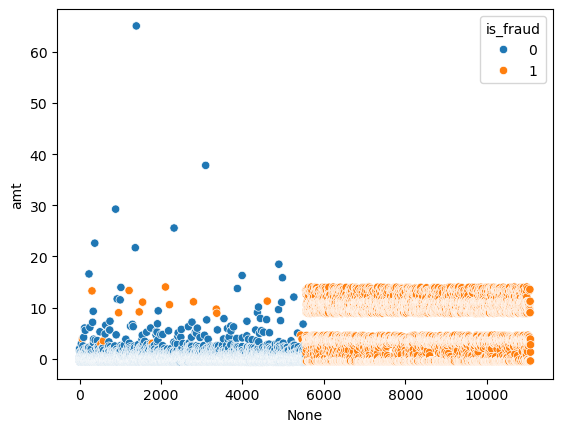

In [132]:
sns.scatterplot(data=data_SM, x=data_SM.index, y='amt', hue='is_fraud')
data_SM.corr()

Correlation between **amt** and **is_fraud** = **0.748879**

Considering the **disadvantages** of Undersampling and Oversampling, **SMOTE** will be the **best** way to balance **our dataset**, despite undersampling having the highest correlation between amt and is_fraud

# Model Building

We will look into **4** classification models to see which is the best machine learning model in helping us to predict fraudulent credit card transactions.

The **4** models are namely, **Gaussian Naive Bayes**, **Random Forest Classifier**, **K-Nearest Neighbors** and **XGBoost**. 

In [154]:
X_SM.to_csv('X_SM.csv', index=False)
y_SM.to_csv('y_SM.csv', index=False)

In [32]:
X_SM = pd.read_csv('X_SM.csv')
y_SM = pd.read_csv('y_SM.csv')

In [35]:
#Combine the SM data and split again
data_SM = pd.concat([X_SM, y_SM],axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SM,y_SM,test_size=0.2,random_state=12345)

In [37]:
X_train.head()

,amt,hourEnc,category_shopping_net,count_7_merch_days,category_misc_net,minute,month_number,gender,count_30_days,second,category_kids_pets,distance,category_entertainment,category_personal_care
5851,13.389811,1.0,1.0,0.0,0.0,0.387601,-0.502606,1.0,-0.08203,0.759160,0.0,0.699818,0.0,0.0
3462,-0.539170,1.0,0.0,1.0,0.0,-0.645161,1.000000,1.0,-0.50000,-0.827586,0.0,0.615104,0.0,0.0
1402,-0.014547,0.0,0.0,0.0,0.0,0.516129,-0.666667,0.0,-0.50000,0.034483,0.0,-0.291236,1.0,0.0
2024,0.511811,0.0,0.0,0.0,0.0,0.483871,0.666667,0.0,-0.50000,0.931034,1.0,0.204584,0.0,0.0
5309,0.273636,0.0,0.0,0.0,0.0,-0.700000,0.000000,1.0,-0.50000,-0.068966,0.0,0.632887,0.0,0.0


In [38]:
## Assuming the positive are N and negative are Y 
## Function to get TPR(True Positive Rate) and FPR(False Positive Rate)
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

## 1. Naive Bayes (Gaussian)

Naive Bayes is a **CLASSIFICATION** algorithm. Gaussian Naive Bayes is an extension which assumes a Gaussian (Normal) distribution. It is primarily based on Bayes Theorem, P(h|d) = (P(d|h) * P(h)) / P(d).

**P(h|d)** : the probability of hypothesis **h** given the data **d**

**P(d|h)** : the probability of data **d** given the hypothesis h was true

**P(h)** : the probability of hypothesis **h** being true 

**P(d)** : the probability of the data **d**

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

Gaussian Naive Bayes Confusion Matrix (Train)
Classification Accuracy:  0.8846110421135824
TPR:  1.0
FPR:  0.2294566681634486


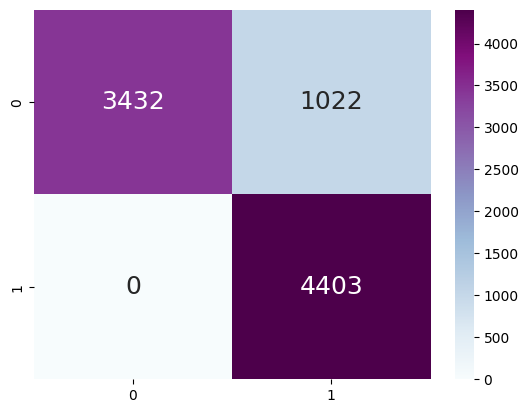

In [41]:
print("Gaussian Naive Bayes Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, gnb_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", gnb.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, gnb_train_pred))
print('FPR: ', get_FPR(y_train, gnb_train_pred))

Gaussian Naive Bayes Confusion Matrix (Test)
Classification Accuracy:  0.8898419864559819
TPR:  1.0
FPR:  0.2255083179297597


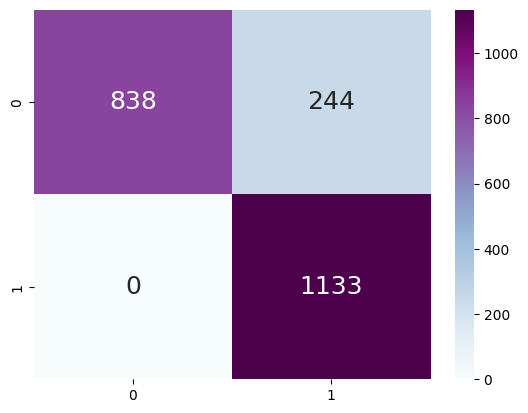

In [42]:
print("Gaussian Naive Bayes Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, gnb_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", gnb.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, gnb_test_pred))
print('FPR: ', get_FPR(y_test, gnb_test_pred))

In [43]:
# F1 Score
print('Gaussian Naive Bayes TRAIN F1 Score: {}'.format(f1_score(y_train,gnb_train_pred)))
print('Gaussian Naive Bayes TEST F1 Score: {}'.format(f1_score(y_test,gnb_test_pred)))

Gaussian Naive Bayes TRAIN F1 Score: 0.896011396011396
Gaussian Naive Bayes TEST F1 Score: 0.902788844621514


## 2. Random Forest Classifier

Random Forest is a classifier that involves a number of decision trees based on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train)

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

Random Forest Classifier Confusion Matrix (Train)
Classification Accuracy:  0.9943547476572203
TPR:  0.9995457642516467
FPR:  0.010776829815895825


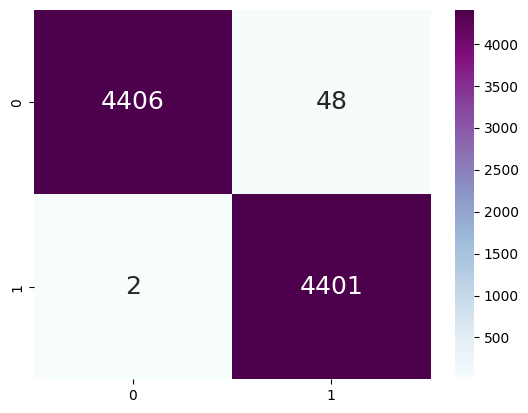

In [45]:
print("Random Forest Classifier Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, rfc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, rfc_train_pred))
print('FPR: ', get_FPR(y_train, rfc_train_pred))

Random Forest Classifier Confusion Matrix (Test)
Classification Accuracy:  0.9914221218961625
TPR:  0.9982347749338041
FPR:  0.015711645101663587


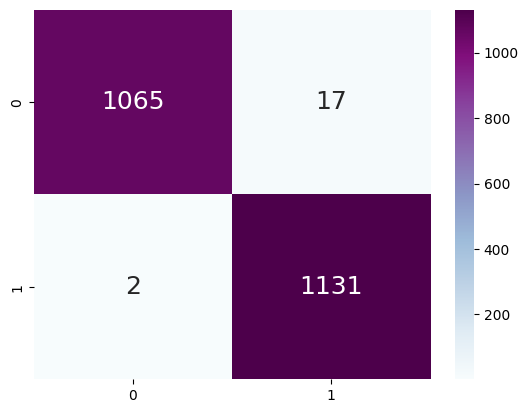

In [46]:
print("Random Forest Classifier Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, rfc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, rfc_test_pred))
print('FPR: ', get_FPR(y_test, rfc_test_pred))

In [47]:
# F1 Score
print('Random Forest Classifier TRAIN F1 Score: {}'.format(f1_score(y_train,rfc_train_pred)))
print('Random Forest Classifier TEST F1 Score: {}'.format(f1_score(y_test,rfc_test_pred)))

Random Forest Classifier TRAIN F1 Score: 0.9943515589697244
Random Forest Classifier TEST F1 Score: 0.9916703200350724


## 3. K-Nearest Neighbors
A supervised machine learning algorithm. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made.

In [48]:
# Optimal k value is 2 based on testing. 
from sklearn.neighbors import KNeighborsClassifier
n=2
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

K-Nearest Neighbors Confusion Matrix (Train)
Classification Accuracy:  1.0
TPR:  1.0
FPR:  0.0


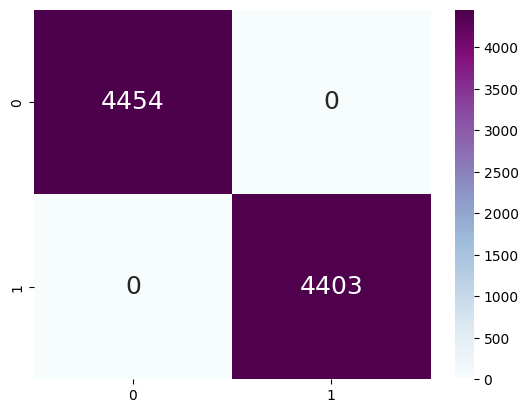

In [49]:
print("K-Nearest Neighbors Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, knn_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, knn_train_pred))
print('FPR: ', get_FPR(y_train, knn_train_pred))

K-Nearest Neighbors Confusion Matrix (Test)
Classification Accuracy:  0.9968397291196388
TPR:  1.0
FPR:  0.006469500924214418


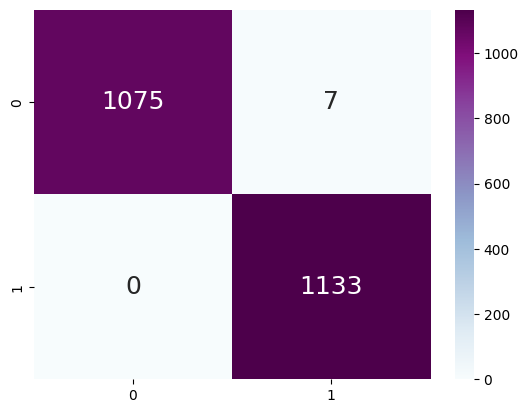

In [50]:
print("K-Nearest Neighbors Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, knn_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, knn_test_pred))
print('FPR: ', get_FPR(y_test, knn_test_pred))

In [51]:
# F1 Score
print('K-Nearest Neighbors TRAIN F1 Score: {}'.format(f1_score(y_train,knn_train_pred)))
print('K-Nearest Neighbors TEST F1 Score: {}'.format(f1_score(y_test,knn_test_pred)))

K-Nearest Neighbors TRAIN F1 Score: 1.0
K-Nearest Neighbors TEST F1 Score: 0.9969203695556533


## 4. XGBoost

Unlike random forest which uses the technique of bagging, XGBoost uses boosting. Boosting involves using trees with fewer splits. Boosting uses an **ensemble** technique which involves the following steps:
- An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
- A new model h1 is fit to the residuals from the previous step
- Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0

Reference: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [52]:
import xgboost as xgb
from xgboost import XGBClassifier

In [53]:
xgbc = XGBClassifier(
         eval_metric='aucpr')
xgbc.fit(X_train, y_train)

xgbc_train_pred = xgbc.predict(X_train)
xgbc_test_pred = xgbc.predict(X_test)

XGBoost Classifier Confusion Matrix (Train)
Classification Accuracy:  1.0
TPR:  1.0
FPR:  0.0


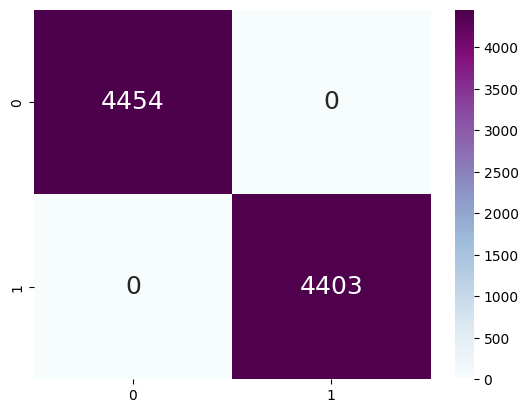

In [54]:
print("XGBoost Classifier Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, xgbc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, xgbc_train_pred))
print('FPR: ', get_FPR(y_train, xgbc_train_pred))

XGBoost Classifier Confusion Matrix (Test)
Classification Accuracy:  0.9977426636568849
TPR:  1.0
FPR:  0.0046210720887245845


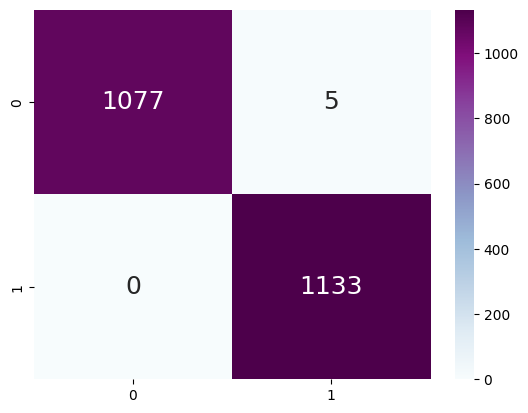

In [55]:
print("XGBoost Classifier Confusion Matrix (Test)")
sns.heatmap(confusion_matrix(y_test, xgbc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, xgbc_test_pred))
print('FPR: ', get_FPR(y_test, xgbc_test_pred))

In [56]:
# F1 Score
print('XGBoost TRAIN F1 Score: {}'.format(f1_score(y_train,xgbc_train_pred)))
print('XGBoost TEST F1 Score: {}'.format(f1_score(y_test,xgbc_test_pred)))

XGBoost TRAIN F1 Score: 1.0
XGBoost TEST F1 Score: 0.9977983267283135


### Deep neural network

We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 14 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).
a dropout step is included to prevent overfitting.

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [61]:
model = Sequential()
model.add(Dense(units=14, input_dim=14, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,795 (7.01 KB)

 Trainable params: 1,795 (7.01 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10, epochs=20)

AttributeError: 'XGBClassifier' object has no attribute 'compile'

In [64]:
score = model.evaluate(X_test,y_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.9953 - loss: 0.0127  


In [65]:
print(score)

[0.0065431129187345505, 0.9977426528930664]


277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
Deep Neural Network Confusion Matrix (Train)
Classification Accuracy:  0.9992096424102783
TPR:  1.0
FPR:  0.001571621014818141


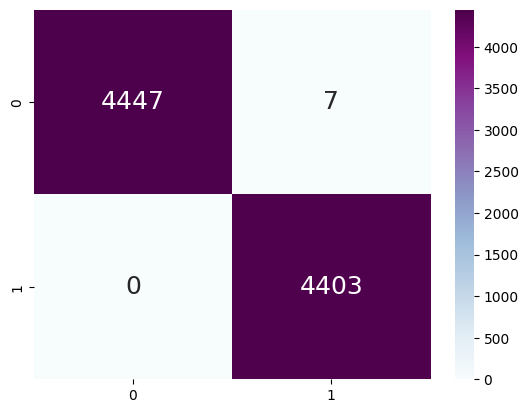

In [72]:
# Predict class labels on the training set
nn_model_train_pred_prob = model.predict(X_train)

# Convert probabilities to binary class labels (assuming binary classification)
nn_model_train_pred = (nn_model_train_pred_prob > 0.5).astype(int)

# Confusion Matrix
print("Deep Neural Network Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_train, nn_model_train_pred), 
            annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

# Classification Accuracy
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]  # Get accuracy from evaluation
print("Classification Accuracy: ", train_accuracy)

# TPR and FPR
print('TPR: ', get_TPR(y_train, nn_model_train_pred))
print('FPR: ', get_FPR(y_train, nn_model_train_pred))

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Deep Neural Network Confusion Matrix (Train)
Classification Accuracy:  0.9990970492362976
TPR:  1.0
FPR:  0.0018484288354898336


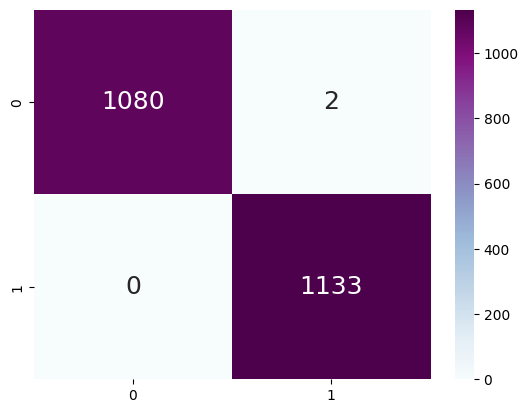

In [73]:
# Predict class labels on the training set
nn_model_test_pred_prob = model.predict(X_test)

# Convert probabilities to binary class labels (assuming binary classification)
nn_model_test_pred = (nn_model_test_pred_prob > 0.5).astype(int)

# Confusion Matrix
print("Deep Neural Network Confusion Matrix (Train)")
sns.heatmap(confusion_matrix(y_test, nn_model_test_pred), 
            annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

# Classification Accuracy
train_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]  # Get accuracy from evaluation
print("Classification Accuracy: ", train_accuracy)

# TPR and FPR
print('TPR: ', get_TPR(y_test, nn_model_test_pred))
print('FPR: ', get_FPR(y_test, nn_model_test_pred))

In [74]:
# F1 Score
print('Neural Network TRAIN F1 Score: {}'.format(f1_score(y_train,nn_model_train_pred)))
print('Neural Network TEST F1 Score: {}'.format(f1_score(y_test,nn_model_test_pred)))

Neural Network TRAIN F1 Score: 0.9992057188244639
Neural Network TEST F1 Score: 0.9991181657848325


### ROC AUC CURVE

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [GaussianNB(),
               RandomForestClassifier(max_depth=4),
               KNeighborsClassifier(n_neighbors=2),
               XGBClassifier(eval_metric='aucpr')]

result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result = pd.DataFrame({'classifiers': [cls.__class__.__name__],
                           'fpr': [fpr], 
                           'tpr': [tpr], 
                           'auc': [auc]})
    
    result_table = pd.concat([result_table, result], ignore_index=True)

# Now adding the neural network model to the result table
nn_model_test_pred_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, nn_model_test_pred_prob)
auc = roc_auc_score(y_test, nn_model_test_pred_prob)

nn_result = pd.DataFrame({'classifiers': ['NeuralNetwork'],
                          'fpr': [fpr], 
                          'tpr': [tpr], 
                          'auc': [auc]})

result_table = pd.concat([result_table, nn_result], ignore_index=True)
result_table.set_index('classifiers', inplace=True)


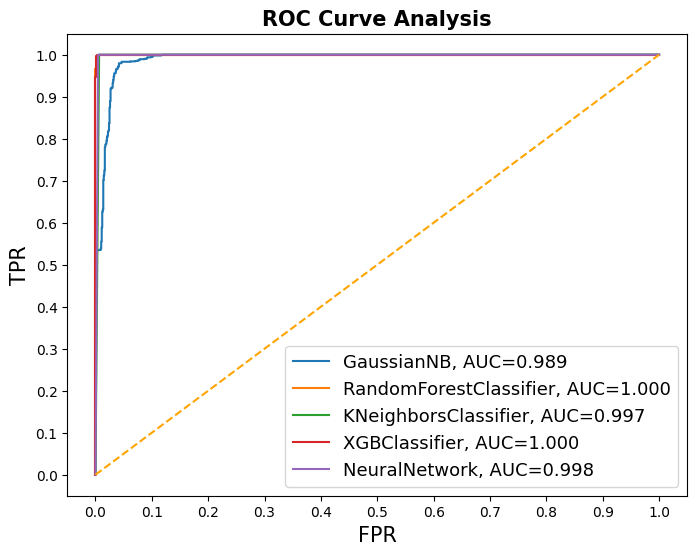

In [80]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("FPR", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("TPR", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [79]:
result_table

,fpr,tpr,auc
classifiers,,,
GaussianNB,"[0.0, 0.0009242144177449168, 0.000924214417744...","[0.0, 0.5172109443954104, 0.5242718446601942, ...",0.989306
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0088261253309797, 0.0176522506619594, ...",0.999864
KNeighborsClassifier,"[0.0, 0.006469500924214418, 0.0101663585951940...","[0.0, 1.0, 1.0, 1.0]",0.996765
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00353045013239188, 0.00706090026478376...",0.999946
NeuralNetwork,"[0.0, 0.0046210720887245845, 1.0]","[0.0, 1.0, 1.0]",0.997689


So when it came to model evaluation, there were a few metrics that we focused on to determine the best and most suitable model for credit card fraud detection. The metrics we took into consideration are:

Reference: https://www.ritchieng.com/machine-learning-evaluate-classification-model/

1. **Confusion Matrix** (Visualisation)

    - Describes the performance of the classification model
    - TP, TN, FP, FN
    

2. **Classification Accuracy**

    - The percentage of correct predictions
    - The **higher** the classification accuracy the **better** the model
    

3. **TPR** (Sensitivity)

    - TPR is known as sensitivity and is **crucial** in the context of detecting fraudulant transactions
    - We should try to optimize the **TPR Value** as much as possible. This is because **FP** values are more 
      acceptable in comparison to **FN** values. 
    - **FP** are the normal transactions detected as fraud transactions
    - **FN** are the fraud transactions detected as normal transactions
    - So definitely **higher TPR values** would be **better**
    

4. **FPR** (Specificity)

    - False Positive Rate is the probability of falsely rejecting the null hypothesis
    - **Lower FPR values** would be **better**
    

5. **F1 Scores**

    - F1 Score is defined as the "harmonic mean of **precision** and **recall**
    - **F1 = 2*(Precision*Recall/Precision+Recall)**
    - The **higher the F1 score** the **better**


6. **Receiver Operating Characteristic (ROC) Curves**

    - ROC curves are used for us to **VISUALISE** how **TPR** and **FPR** vary various thresholds


7. **AUC Values**

    - AUC is the **percentage** of the **ROC plot** underneath the **curve**
    - Essentially it is a **single number summary** of a classifier's performance
    - A **higher AUC value** indicates a **better classifier**
    - AUC is **good** for data with **huge class imbalance** but we have resolved it using **SMOTE**

### 1. Classification Accuracy
**XGBoost** has the **highest classification accuracy value** of **1.0** for **Train set** and **0.99910 (5.SF)** for **Test set**

### 2. Highest TPR Value
**XGBoost** has the **highest TPR value** of **1.0** for **BOTH Train and Test sets**

### 3. Lowest FPR Value
**XGBoost** has the **lowest FPR value** of **0.0** for **Train set** and **0.0018484 (5.SF)** for **Test set**

### 4. F1 Score
**XGBoost** has the **highest F1 score** of **1.0** for **Train set** and **0.99912** for **Test set**

### 5. ROC & AUC
**XGBoost** and **RandomForestClassifier** have the **highest AUC value** of **1.0**

### To conclude, XGBoost has been determined to be the BEST and MOST SUITABLE machine learning model to detect fraudulant credit card transactions. 